# NYC Regents Exploratory Analysis
In New York state, public high school students take courses across a range of disciplines, including English, math, history, science, foreign language, and more. Students are expected to pass standardized tests called Regents exams that assess a student's understanding of the courses. A student must pass at least 5 Regents tests (1 in English, 1 in math, 1 in science, 1 in history, and 1 in any subject, usually foreign language in many schools). High school students must pass enough courses and Regents tests to graduate. More information can be found [here](https://www.schools.nyc.gov/learning/student-journey/graduation-requirements).

[NYC Open Data](https://opendata.cityofnewyork.us/) has a dataset about the city's Regents exam scores over the years. I downloaded the 2015 to 2019 Regents scores of all NYC schools that offered the exams to their students. The majority of the schools are high schools, but select middle schools offer accelerated programs in which students take at least 1 high school-level course and become eligible for the course's accompanying Regents exam.

In this analysis, I visualized trends and patterns across high school performances over the years. The dataset organized the results by gender, ethnicity, disability status, and English Language Learner (ELL) status. I began by finding patterns across schools in general, followed by comparisons of student groups based on these variables. As someone who attended and taught in NYC public schools, I was curious about what the data showed.

Any opinion or statement in this analysis is my own and does not reflect the opinion of the NYC Department of Education, schools in NYC, and my previous employers. I performed this analysis to solely practice data visualization and statistical analysis in Python, and I cannot guarantee the accuracy of my findings. I'm still learning basic data science, so take the findings in this analysis with a grain of salt.

## Overview of Citywide Performances

In [1]:
# import packages
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
# import all student data
all_student = pd.read_csv('All Students.csv')
all_student.head()

,Unnamed: 0,School DBN,School Name,School Type,School Level,Regents Exam,Year,Category,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
0,01M0342015All StudentsLiving Environment,01M034,P.S. 034 Franklin D. Roosevelt,General Academic,K-8,Living Environment,2015,All Students,16,77.9,1,6.3,15,93.8,7,43.8,na,na
1,01M0342016All StudentsLiving Environment,01M034,P.S. 034 Franklin D. Roosevelt,General Academic,K-8,Living Environment,2016,All Students,9,74.0,1,11.1,8,88.9,2,22.2,na,na
2,01M0342017All StudentsCommon Core Algebra,01M034,P.S. 034 Franklin D. Roosevelt,General Academic,K-8,Common Core Algebra,2017,All Students,4,s,s,s,s,s,s,s,s,s
3,01M0342018All StudentsCommon Core Algebra,01M034,P.S. 034 Franklin D. Roosevelt,General Academic,K-8,Common Core Algebra,2018,All Students,2,s,s,s,s,s,s,s,s,s
4,01M0342018All StudentsLiving Environment,01M034,P.S. 034 Franklin D. Roosevelt,General Academic,K-8,Living Environment,2018,All Students,2,s,s,s,s,s,s,s,s,s


The dataset shows the mean scores, percent scoring below/above 65, percent scoring below/above 80, percent college ready, and other data for each school. It's important to recognize that each index's data is specific to a certain Regents test in a specific year (i.e. index 0 is PS 034 Franklin Roosevelt's data for the 2015 Living Environment Exam, while index 2 is for the 2017 Common Core Algebra exam).

In [3]:
all_student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33031 entries, 0 to 33030
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Unnamed: 0                   33031 non-null  object
 1   School DBN                   33031 non-null  object
 2   School Name                  33031 non-null  object
 3   School Type                  33031 non-null  object
 4   School Level                 33031 non-null  object
 5   Regents Exam                 33031 non-null  object
 6   Year                         33031 non-null  int64 
 7   Category                     33031 non-null  object
 8   Total Tested                 33031 non-null  int64 
 9   Mean Score                   33031 non-null  object
 10  Number Scoring Below 65      33031 non-null  object
 11  Percent Scoring Below 65     33031 non-null  object
 12  Number Scoring 65 or Above   33031 non-null  object
 13  Percent Scoring 65 or Above  33

In [4]:
# Remove duplicate rows, if any
all_student = all_student.drop_duplicates()

In [5]:
all_student['School Type'].unique()

array(['General Academic', 'Transfer School', 'Special Education',
       'Career Technical', 'YABC'], dtype=object)

It's interesting that the dataset contains Regents information from different types of schools. Career Technical schools offer vocational-like education, while YABC are young adult schools that offer remedial classes for students who are need more time to earn their graduation credits.

In [6]:
all_student['School Level'].unique()

array(['K-8', 'High school', 'Junior High-Intermediate-Middle',
       'Secondary School', 'K-12 all grades', 'Elementary', 'Ungraded'],
      dtype=object)

The dataset includes Regents results from non-high schools that offer accelerated courses. I've never heard of an elementary school offering Regents courses and exams, though. Not sure why it's there.

In this analysis, I also want to solely focus on high school students, because I used to be a high school teacher. I will remove all schools that contain grades other than 9 through 12. Unfortunately, this does mean I'll remove schools that offer K-12, because those schools might also offer the Regents curriculum to their middle schoolers. I don't want to mix high school data with middle school data. I could manually look up the school names online and verify their middle school curricula from 2015 to 2019, but that's a lot of tedious work that I don't want to delve into.

I originally used a for loop to subset dataframes, but it took a long time. So, I found a StackOverflow [post](https://stackoverflow.com/questions/57392878/how-to-speed-up-pandas-drop-method) about using the isin() method from [pandas](https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html?highlight=subset#how-do-i-filter-specific-rows-from-a-dataframe). It was so MUCH faster!

In [7]:
num_all_hs = len(all_student[all_student['School Level'].isin(['High school', 'Secondary School', 'K-12 all grades'])])
num_k12 = len(all_student[all_student['School Level'].isin(['K-12 all grades'])])
all_student = all_student[all_student['School Level'].isin(['High school', 'Secondary School'])]
print(f'Removed {num_k12/num_all_hs*100}% of high school data to prevent potential inclusion of middle school data')

Removed 5.27524531978565% of high school data to prevent potential inclusion of middle school data


In [8]:
all_student.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27222 entries, 32 to 32946
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Unnamed: 0                   27222 non-null  object
 1   School DBN                   27222 non-null  object
 2   School Name                  27222 non-null  object
 3   School Type                  27222 non-null  object
 4   School Level                 27222 non-null  object
 5   Regents Exam                 27222 non-null  object
 6   Year                         27222 non-null  int64 
 7   Category                     27222 non-null  object
 8   Total Tested                 27222 non-null  int64 
 9   Mean Score                   27222 non-null  object
 10  Number Scoring Below 65      27222 non-null  object
 11  Percent Scoring Below 65     27222 non-null  object
 12  Number Scoring 65 or Above   27222 non-null  object
 13  Percent Scoring 65 or Above  2

In [9]:
# Drop unneeded columns
all_student = all_student.drop(['School DBN', 'School Name', 'School Type', 'Total Tested', 'Number Scoring Below 65', 
                                'Percent Scoring Below 65', 'Number Scoring 65 or Above', 'Number Scoring 80 or Above', 
                                'Percent Scoring 80 or Above', 'Number Scoring CR',
                                'Unnamed: 0'], axis = 1)

The numerical data is stored as object types during the import, which prevent them from being visualized. I need to turn them into numerical data. At first, I tried to turn them into int64 type, but it didn't work. I thought I made a mistake with my code , then I found a StackOverflow [post](https://stackoverflow.com/questions/1841565/valueerror-invalid-literal-for-int-with-base-10) and realized that I need to use float64 type, because the numbers are decimals.

I also used another StackOverflow [post](https://stackoverflow.com/questions/26805445/adding-null-values-to-a-pandas-dataframe) to find out that I can replace 'na' values in the data with the NaN data type from [numpy](https://numpy.org/doc/stable/reference/constants.html#numpy.nan). For some reason, some schools have "s" as the Regents performances. I don't know what this means, as it's not explained in the dataset. I also turned all of those into NaN data type. I learned to change the data types using a for loop that I learned from a YouTube [video](https://www.youtube.com/watch?v=iPYVYBtUTyE&list=PLUaB-1hjhk8H48Pj32z4GZgGWyylqv85f&index=4) by Alex the Analyst.

In [10]:
# Change the object data types to numeric data types
num_columns = ['Mean Score', 'Percent Scoring 65 or Above', 'Percent Scoring CR']
for name in num_columns:
    column = all_student[name].replace('na', np.nan)
    column = column.replace('s', np.nan)
    all_student[name] = column.astype('float64')

In [11]:
# Remove all Mean Scores with nan values
all_student = all_student.dropna(axis = 0, subset = ['Mean Score'])
list(all_student['Mean Score'].isnull()).count(True), list(all_student['Mean Score'].isnull()).count(False)

(0, 24696)

In [12]:
all_student.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24696 entries, 34 to 32946
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   School Level                 24696 non-null  object 
 1   Regents Exam                 24696 non-null  object 
 2   Year                         24696 non-null  int64  
 3   Category                     24696 non-null  object 
 4   Mean Score                   24696 non-null  float64
 5   Percent Scoring 65 or Above  24696 non-null  float64
 6   Percent Scoring CR           11426 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 1.5+ MB


In [13]:
# Check out the list of unique Regents tests
all_student['Regents Exam'].unique()

array(['Common Core Algebra', 'Common Core English',
       'Common Core Geometry', 'English', 'Geometry',
       'Global History and Geography', 'Integrated Algebra',
       'Living Environment', 'Physical Settings/Earth Science', 'Spanish',
       'U.S. History and Government', 'Common Core Algebra2',
       'Physical Settings/Chemistry', 'Algebra2/Trigonometry', 'Chinese',
       'Physical Settings/Physics', 'French', 'Italian'], dtype=object)

I'm not sure how other states operate, but NY offers Regents tests across many subjects. I remember taking these tests, except most of the foreign language ones (I took the Chinese exam).

## Science Regents Distribution

I taught high school biology (called Living Environment in NY) for 2 years, so I'm curious how the city did as a whole across the science exams.

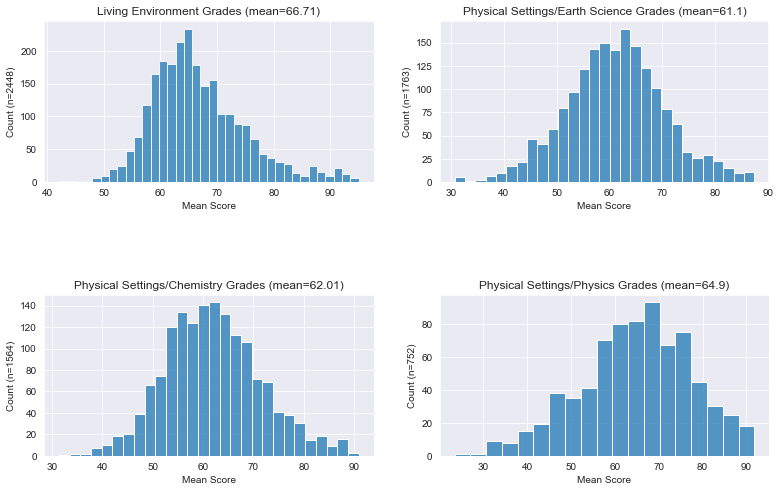

In [14]:
plt.figure(figsize = (13, 8))
sns.set_style(style = 'darkgrid')

test_names = ['Living Environment', 'Physical Settings/Earth Science', 'Physical Settings/Chemistry', 'Physical Settings/Physics']

for index in range(1, 5):
    plt.subplot(2, 2, index)
    test = all_student[all_student['Regents Exam'] == test_names[index - 1]]
    sns.histplot(data = test, x = 'Mean Score')
    scores = test['Mean Score']
    plt.title(f'{test_names[index - 1]} Grades (mean={round(scores.mean(), 2)})')
    plt.ylabel(f'Count (n={len(test)})')

plt.subplots_adjust(hspace = 0.7)

The passing scores are 65% for General Education students and 55% for Special Education students on all Regents exams. The distributions are based on schools' annual mean scores from 2015 to 2019. The mean scores for all 4 tests ranged from 61.1 on Earth Science to 66.71 on Living Environment. Under a bell-curve model, this means roughly half of all the annual mean scores were below passing.

Recall that the data points counted in the distribution are not individual student results. Each data point is an arbitrary school's mean score in a year between 2015 and 2019; a single school's mean scores from multiple years are counted, if available. There are 2448 data points for the Living Environment exam, which is much higher than the other exams, like Physics with only 752 data points. This isn't too surprising. Most high schools prepare freshmen to take the Living Environment or Earth Science before Chemistry and Physics. If a student fails the test, they're usually expected to retake it at a later date. Chemistry and Physics are taken by those who passed Living Environment and/or Earth Science, and they're math-heavy courses. Recall that students can still graduate by passing only 1 science Regents exam and still fail or not take all other science Regents exams. The fewer data points for Chemistry and Physics are probably the result of schools not offering these exams, as they're technically not necessary for graduation. Of course, I could be wrong.

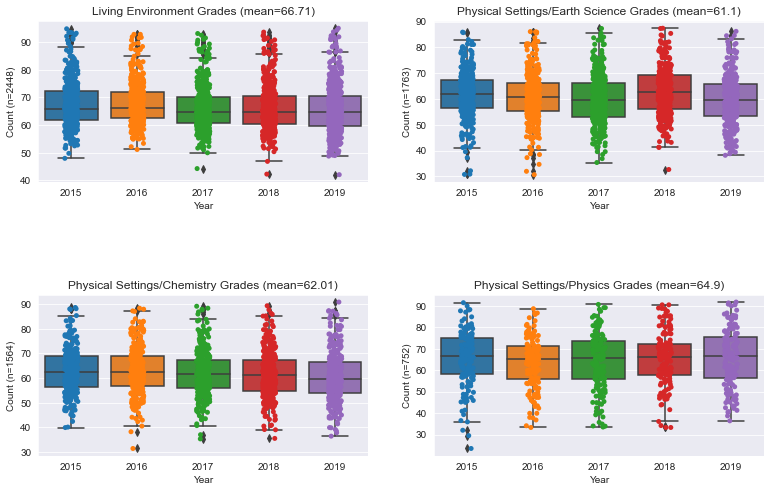

In [15]:
plt.figure(figsize = (13, 8))

test_names = ['Living Environment', 'Physical Settings/Earth Science', 'Physical Settings/Chemistry', 'Physical Settings/Physics']
for index in range(1, 5):
    plt.subplot(2, 2, index)
    test = all_student[all_student['Regents Exam'] == test_names[index - 1]]
    sns.stripplot(data = test, x = 'Year', y = 'Mean Score')
    sns.boxplot(data = test, x = 'Year', y = 'Mean Score')    
    scores = test['Mean Score']
    plt.title(f'{test_names[index - 1]} Grades (mean={round(scores.mean(), 2)})')
    plt.ylabel(f'Count (n={len(test)})')

plt.subplots_adjust(hspace = 0.7)

Looks like the mean scores didn't differ much across the years for all 4 exams. They all hovered in the 60s from 2015 to 2019.

## History Regents Distribution

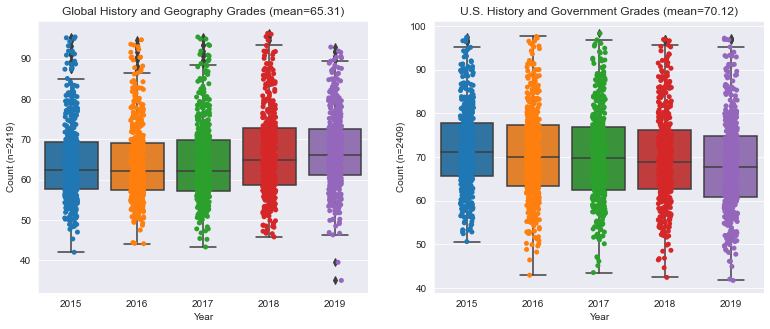

In [16]:
plt.figure(figsize = (13, 5))

test_names = ['Global History and Geography', 'U.S. History and Government']
for index in range(1, 3):
    plt.subplot(1, 2, index)
    test = all_student[all_student['Regents Exam'] == test_names[index - 1]]
    sns.stripplot(data = test, x = 'Year', y = 'Mean Score')
    sns.boxplot(data = test, x = 'Year', y = 'Mean Score')
    scores = test['Mean Score']
    plt.title(f'{test_names[index - 1]} Grades (mean={round(scores.mean(), 2)})')
    plt.ylabel(f'Count (n={len(test)})')

plt.subplots_adjust(hspace = 0.7)

Students performed better on US History (mean score is 70.12%) than World History (mean score is 65.31%). This is unsurprising, because the World History curriculum is 2-years long, compared to the 1-year long US History curriculum. Both exams are reading and writing heavy with long passages and historical document-based essays, so literacy skills are integral to the exams.

## Math Regents Distribution

After Common Core was adopted, the math and English exams were revised to fit the new standards. The prior algebra tests were called "Integrated Algebra" and "Algebra 2/Trigonometry", and the English exam was simply called "English".

In [17]:
all_student[all_student['Regents Exam'] == 'Integrated Algebra'].Year.unique()

array([2015, 2016], dtype=int64)

It looks like Integrated Algebra was last given in 2016 until the Common Core version was completely [adopted](https://www.nysedregents.org/integratedalgebra/). They were both administered in 2015 and 2016, and the Common Core was fully adopted across all schools afterwards. When I was in school, I heard rumors that the Common Core versions were harder than the prior ones. I'm curious to see how schools performed on both versions.

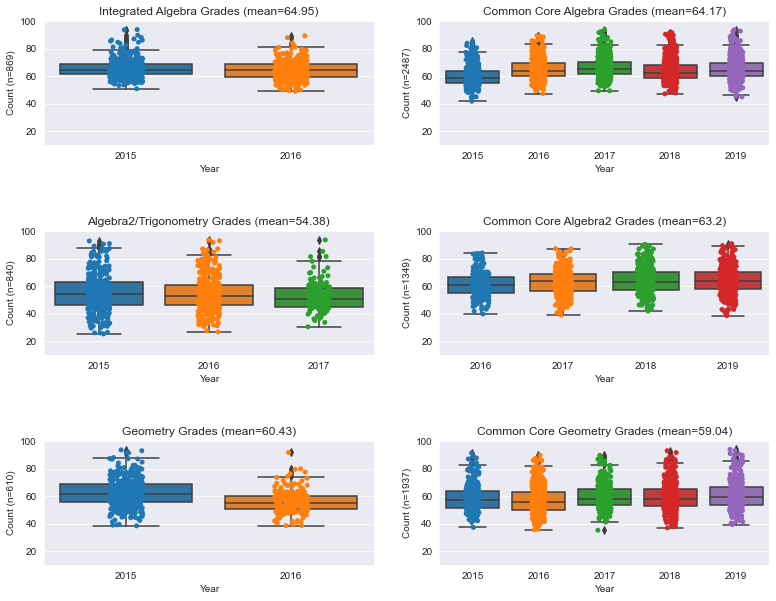

In [18]:
plt.figure(figsize = (13, 10))

test_names = ['Integrated Algebra', 'Common Core Algebra', 'Algebra2/Trigonometry', 'Common Core Algebra2',
              'Geometry', 'Common Core Geometry']
for index in range(1, 7):
    plt.subplot(3, 2, index)
    test = all_student[all_student['Regents Exam'] == test_names[index - 1]]
    scores = test['Mean Score']
    plt.title(f'{test_names[index - 1]} Grades (mean={round(scores.mean(), 2)})')
    plt.ylim(10, 100)
    sns.stripplot(data = test, x = 'Year', y = 'Mean Score')
    sns.boxplot(data = test, x = 'Year', y = 'Mean Score')
    plt.ylabel(f'Count (n={len(test)})')
    
plt.subplots_adjust(hspace = 0.7)

The Algebra and Geometry average scores dropped by about 1% since Common Core was adopted, but the Algebra 2 average increased by about 9%. I guess the rumor was true for only the Algebra and Geometry tests.

## ELA Regents Distribution

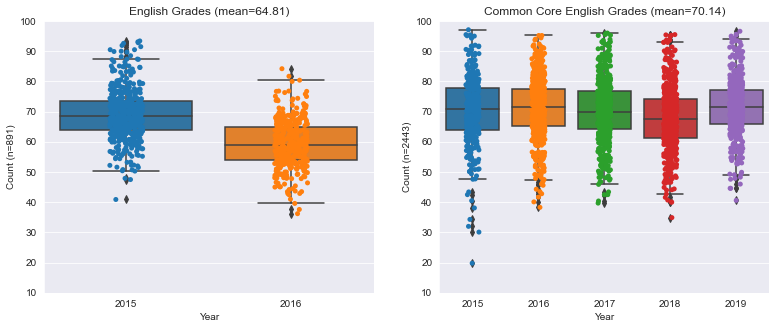

In [19]:
plt.figure(figsize = (13, 5))

test_names = ['English', 'Common Core English']
for index in range(1, 3):
    plt.subplot(1, 2, index)
    test = all_student[all_student['Regents Exam'] == test_names[index - 1]]
    scores = test['Mean Score']
    plt.title(f'{test_names[index - 1]} Grades (mean={round(scores.mean(), 2)})')
    plt.ylim(10, 100)
    sns.stripplot(data = test, x = 'Year', y = 'Mean Score')
    sns.boxplot(data = test, x = 'Year', y = 'Mean Score')
    plt.ylabel(f'Count (n={len(test)})')
    
plt.subplots_adjust(hspace = 0.7)

I'm surprised the Common Core adoption led to an approximate 5% average increase on the English Regents exam scores. Maybe the Common Core curriculum better prepared students for English proficiency? It's unclear, because the Common Core probably had different standards from the previous curriculum.

The dataset states what percentage of a school earned at least 65% on a Regents test in any given year. Let's visualize the frequency distribution of the percentages to see the passing rates of schools across the city from 2015 to 2019.

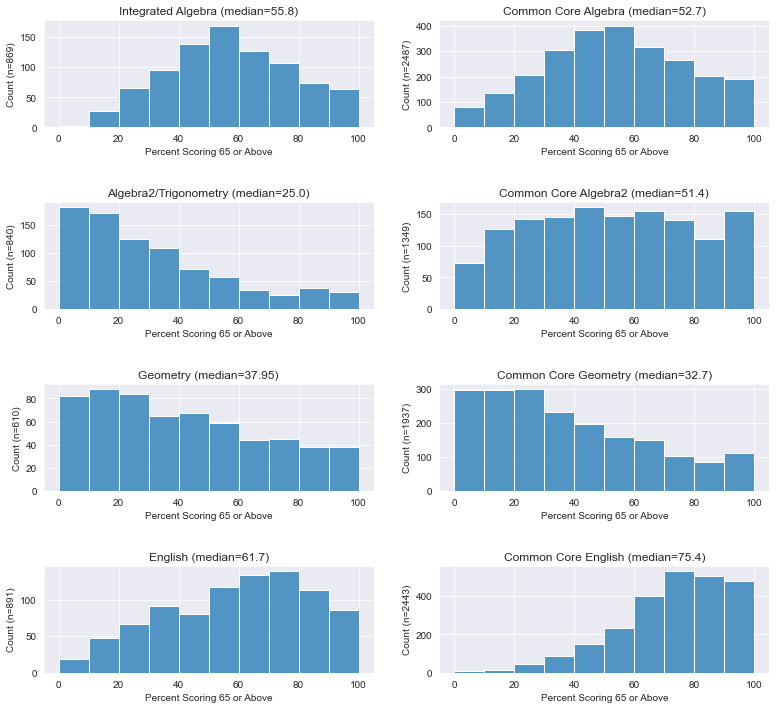

In [20]:
plt.figure(figsize = (13, 12))

test_names = ['Integrated Algebra', 'Common Core Algebra', 'Algebra2/Trigonometry', 'Common Core Algebra2',
              'Geometry', 'Common Core Geometry', 'English', 'Common Core English']

for index in range(1, 9):
    plt.subplot(4, 2, index)
    test = all_student[all_student['Regents Exam'] == test_names[index - 1]]
    sns.histplot(data = test, x = 'Percent Scoring 65 or Above', bins = 10)    
    scores = test['Percent Scoring 65 or Above']
    plt.title(f'{test_names[index - 1]} (median={round(scores.median(), 2)})')
    plt.ylabel(f'Count (n={len(test)})')

plt.subplots_adjust(hspace = 0.7)

The distributions provide insight into the effects of Common Core on passing rate. Before Common Core tests were fully adopted and administered, the median passing rates of high schools on Integrated Algebra, Algebra 2, Geometry, and English were 55.8%, 25.0%, 37.95%, and 61.7%. The Common Core tests had better results (except for Common Core Algebra and Geometry). English passing rate jumped to 75.4%, and Algebra 2 saw a huge jump to 51.4% (more than double the passing rate of the old exam). It seems that the Common Core adoption has led to higher passing rates.

## Foreign Language Distribution

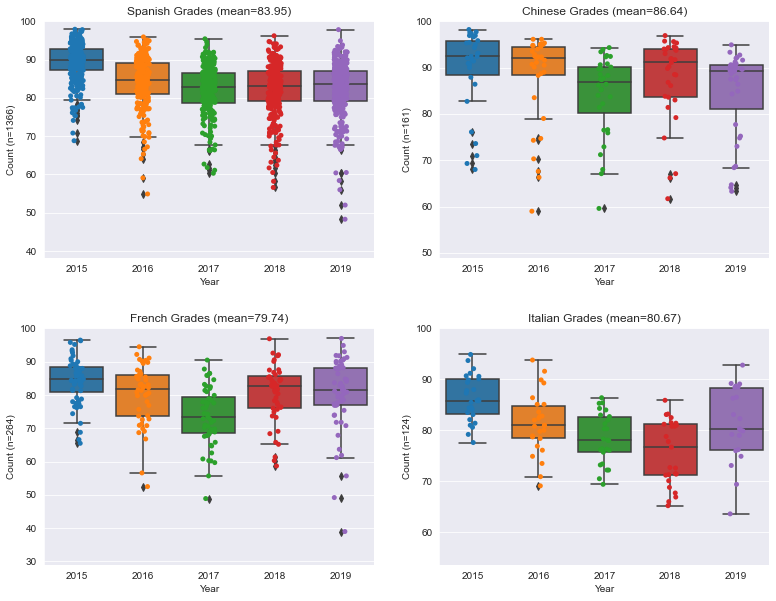

In [21]:
plt.figure(figsize = (13, 10))

test_names = ['Spanish', 'Chinese', 'French', 'Italian']
for index in range(1, 5):
    plt.subplot(2, 2, index)
    test = all_student[all_student['Regents Exam'] == test_names[index - 1]]
    scores = test['Mean Score']
    plt.title(f'{test_names[index - 1]} Grades (mean={round(scores.mean(), 2)})')
    plt.ylim(scores.min() - 10, 100)
    sns.stripplot(data = test, x = 'Year', y = 'Mean Score')
    sns.boxplot(data = test, x = 'Year', y = 'Mean Score')
    plt.ylabel(f'Count (n={len(test)})')
    
plt.subplots_adjust(hspace = 0.3)

The foreign language exams had the highest average scores out of all the exams. Students are allowed to pick whatever language they wish to study, so multilingual students can take the class about their own mother tongues. I chose Chinese, because I'm Chinese and have prior exposure to Mandarin, which is the dialect covered in the course (fun fact: Chinese is not a language. Chinese is more accurately defined as a collection of the over 200 dialects in China. Mandarin, however, is the most popular and the official national language).

## College Readiness Distribution

The dataset has data on what percentage of a school is ready for college based on the ELA and math Regents scores, based on what I saw when I opened the file in Excel. Let's compare college readiness levels based on English and math scores.

In [22]:
all_student = all_student.dropna(axis = 0, subset = ['Percent Scoring CR'])
all_student['Regents Exam'].unique()

array(['Common Core Algebra', 'Common Core English',
       'Common Core Geometry', 'English', 'Geometry',
       'Integrated Algebra', 'Common Core Algebra2',
       'Algebra2/Trigonometry'], dtype=object)

In [23]:
math_names = ['Integrated Algebra', 'Common Core Algebra', 'Algebra2/Trigonometry', 'Common Core Algebra2',
              'Geometry', 'Common Core Geometry']
ela_names = ['English', 'Common Core English']

ela = all_student[all_student['Regents Exam'].isin(ela_names)]
math = all_student[all_student['Regents Exam'].isin(math_names)]

print(ela['Regents Exam'].unique(), math['Regents Exam'].unique())

['Common Core English' 'English'] ['Common Core Algebra' 'Common Core Geometry' 'Geometry'
 'Integrated Algebra' 'Common Core Algebra2' 'Algebra2/Trigonometry']


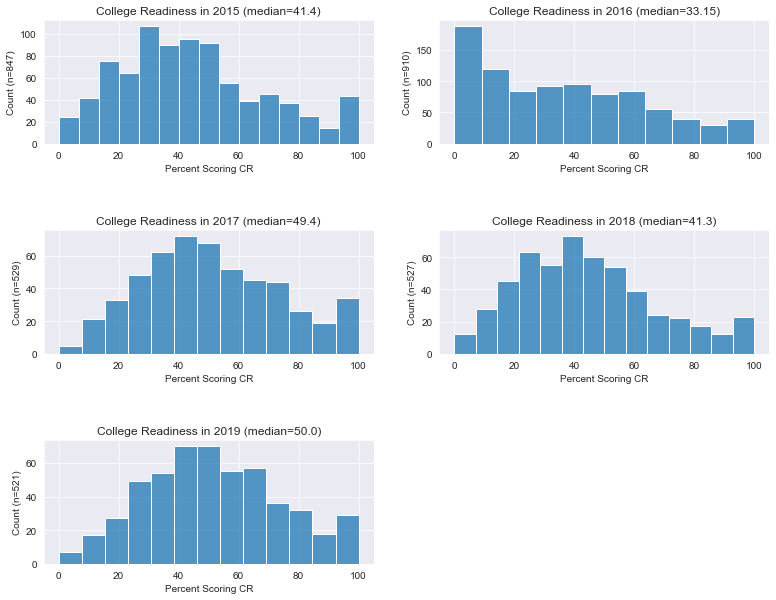

In [24]:
plt.figure(figsize = (13, 10))

years = np.sort(ela.Year.unique())

for index in range(1, 6):
    plt.subplot(3, 2, index)
    info = ela[ela['Year'] == years[index - 1]]
    sns.histplot(data = info, x = 'Percent Scoring CR')
    percentages = info['Percent Scoring CR']
    plt.ylabel(f'Count (n={len(info)})')
    plt.title(f'College Readiness in {years[index - 1]} (median={round(percentages.median(), 2)})')

plt.subplots_adjust(hspace = 0.7)

The median percentages of English college-ready students in high schools ranged from 33.15% in 2016 to 50.0% in 2019. Although there was a slight upward trend, this is still very concerning. The highest percentage of 50.0% in 2019 means the schools in NYC have produced many students who are not college ready in terms of English.

Let's check out the math readiness levels.

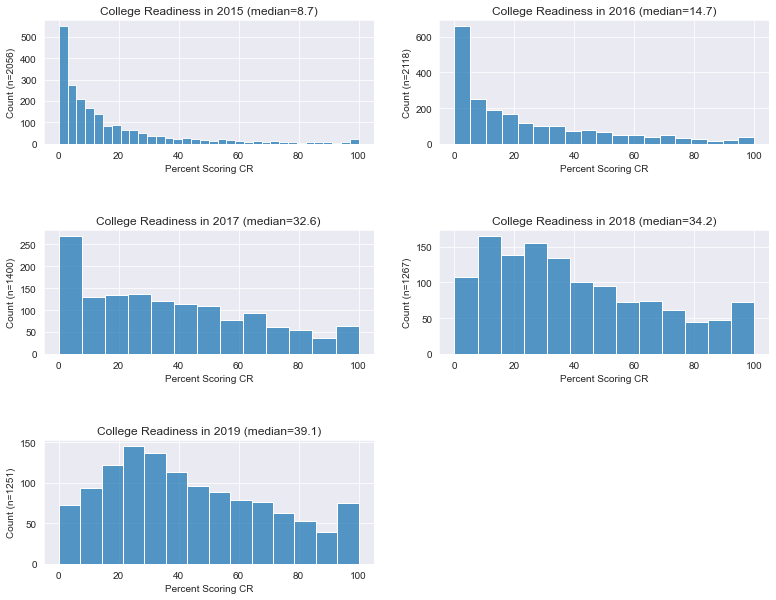

In [25]:
plt.figure(figsize = (13, 10))

years = np.sort(math.Year.unique())

for index in range(1, 6):
    plt.subplot(3, 2, index)
    info = math[math['Year'] == years[index - 1]]
    sns.histplot(data = info, x = 'Percent Scoring CR')
    percentages = info['Percent Scoring CR']
    plt.ylabel(f'Count (n={len(info)})')
    plt.title(f'College Readiness in {years[index - 1]} (median={round(percentages.median(), 2)})')

plt.subplots_adjust(hspace = 0.7)

These distributions are much more interesting than the ELA distributions. In 2015 and 2016, the median math college readiness levels were below 15%, which is scary. The distributions are incredibly skewed to the right. To my knowledge, college math usually starts with calculus or pre-calculus. The low readiness levels mean that students were not grasping fundamental algebra concepts needed for higher level math. I actually heard a story from one of my old colleagues about City University of New York providing remedial instruction to NYC high school graduates who didn't have foundational algebra understanding. These distributions put it into perspective for me. Fortunately, the median readiness level increased to 39.1% by 2019. This is a significant improvement, but much still needs to be done to ensure more students are math proficient for college.

The college readiness levels shown in these distributions suggest concerns for the success of NYC students in college. This [article](https://www.publicschoolreview.com/blog/new-york-city-schools-deficient-college-readiness) talks about the lack of college preparedness in NYC schools.

## Results by Gender
Now, let's analyze trends in school performances by gender.

In [26]:
gender = pd.read_csv('Data by Gender.csv')
gender = gender.drop_duplicates()
gender = gender.drop(['School DBN', 'School Name', 'School Type', 'Total Tested',
                      'Number Scoring Below 65', 'Percent Scoring Below 65', 'Number Scoring 65 or Above',
                      'Number Scoring 80 or Above', 'Percent Scoring 80 or Above', 'Number Scoring CR',
                      'Unnamed: 0'], axis = 1)
gender = gender[gender['School Level'].isin(['High school', 'Secondary School'])]
gender = gender.dropna(axis = 0, subset = ['Mean Score'])
gender.head()

,School Level,Regents Exam,Year,Category,Mean Score,Percent Scoring 65 or Above,Percent Scoring CR
58,High school,Algebra2/Trigonometry,2015,Female,s,s,s
59,High school,Algebra2/Trigonometry,2015,Male,s,s,s
60,High school,Chinese,2015,Male,s,s,s
61,High school,Common Core Algebra,2015,Female,s,s,s
62,High school,Common Core Algebra,2015,Male,s,s,s


In [27]:
num_columns = ['Mean Score', 'Percent Scoring 65 or Above', 'Percent Scoring CR']
for name in num_columns:
    column = gender[name].replace('na', np.nan)
    column = column.replace('s', np.nan)
    gender[name] = column.astype('float64')
gender.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52095 entries, 58 to 62737
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   School Level                 52095 non-null  object 
 1   Regents Exam                 52095 non-null  object 
 2   Year                         52095 non-null  int64  
 3   Category                     52094 non-null  object 
 4   Mean Score                   44030 non-null  float64
 5   Percent Scoring 65 or Above  44030 non-null  float64
 6   Percent Scoring CR           20150 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 3.2+ MB


When I was in teacher training back in undergraduate, I read an article about "stereotype threat." A "stereotype threat" in education is the self-perception that oneself is less capable in certain subjects as a result of being part of a particular group. An example is the idea that females are generally less capable than males in STEM subjects, and female students who embrace this idea are less likely to pursue technical fields. For more info about the topic, [click here](https://philosophy.rutgers.edu/climate-v2/climate-issues-in-academic-philosophy/stereotype-threat). I remember feeling uneased reading about "stereotype threat," because bias and prejudice create unfairness. I would be happy if more of my former students pursue a STEM field. I'm curious whether the Regents results will display any disparities between male and female performances.

## Science Performance by Gender

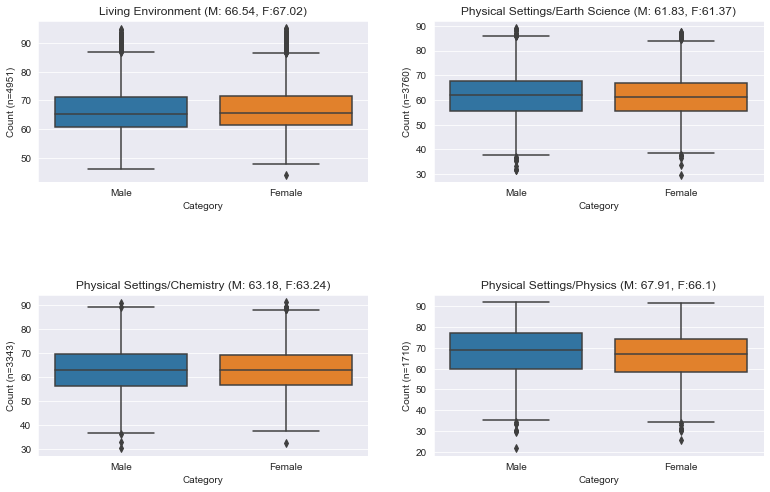

In [28]:
plt.figure(figsize = (13, 8))

test_names = ['Living Environment', 'Physical Settings/Earth Science', 'Physical Settings/Chemistry', 'Physical Settings/Physics']
for index in range(1, 5):
    plt.subplot(2, 2, index)
    test = gender[gender['Regents Exam'] == test_names[index - 1]]
    sns.boxplot(data = test, x = 'Category', y = 'Mean Score', order = ['Male', 'Female'])    
    male_scores = test[test['Category'] == 'Male']
    male_avg = round(male_scores['Mean Score'].mean(), 2)
    female_scores = test[test['Category'] == 'Female']
    female_avg = round(female_scores['Mean Score'].mean(), 2)
    plt.title(f'{test_names[index - 1]} (M: {male_avg}, F:{female_avg})')
    plt.ylabel(f'Count (n={len(test)})')

plt.subplots_adjust(hspace = 0.7)

The mean scores between female and male students differed by roughly 0.1-2% on all the science Regents from 2015 to 2019.

Now, let's check out the math results over time. I had trouble adjusting the scale for the Year axis, because seaborn (it's actually matplotlib under the hood) autoscales the axis and the autoscaling produced decimals in the axis. I went to a GeeksforGeeks [article](https://www.geeksforgeeks.org/how-to-adjust-number-of-ticks-in-seaborn-plots/) for assistance. It turns out that we can manually adjust the scales by passing a list of strings as the x ticks, which gave me an idea. I first turned the Year column into an object type. Since it's no longer int64 type, seaborn would plot the years in the order they appear in the dataset. To resolve this, I re-ordered the dataset by year to ensure seaborn plots the years in chronological order.

## Math Performance by Gender

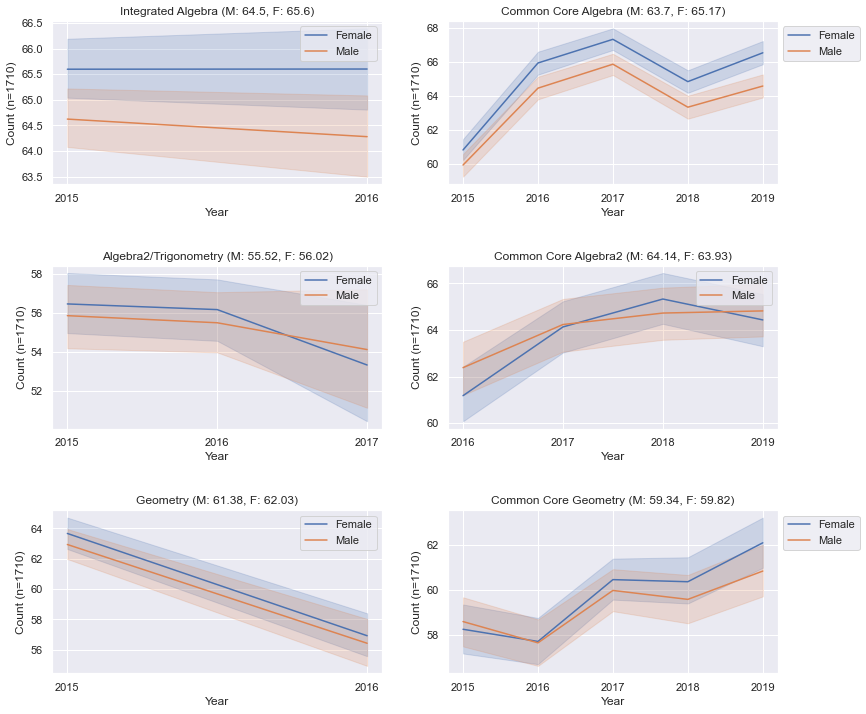

In [29]:
gender['Year'] = gender['Year'].astype('str')

plt.figure(figsize = (13, 12))
sns.set(style="darkgrid")

test_names = ['Integrated Algebra', 'Common Core Algebra', 'Algebra2/Trigonometry', 'Common Core Algebra2', 'Geometry',
              'Common Core Geometry']

for index in range(1, 7):
    plt.subplot(3, 2, index)
    
    # Split the dataset by years and combine them in chronological order
    unordered = gender[gender['Regents Exam'] == test_names[index - 1]]
    years = np.sort(unordered['Year'].unique())
    subset_list = []
    for year in years:
        subset_list.append(unordered[unordered['Year'].isin([year])])
    ordered = pd.concat(subset_list, axis = 0)
    
    # Graph the data
    graph = sns.lineplot(data = ordered, x = 'Year', y = 'Mean Score', hue = 'Category', hue_order = ['Female', 'Male'])  
    male_scores = ordered[ordered['Category'] == 'Male']
    male_avg = round(male_scores['Mean Score'].mean(), 2)
    female_scores = ordered[ordered['Category'] == 'Female']
    female_avg = round(female_scores['Mean Score'].mean(), 2)
    plt.title(f'{test_names[index - 1]} (M: {male_avg}, F: {female_avg})')
    plt.ylabel(f'Count (n={len(test)})')
    plt.legend(bbox_to_anchor = (1,1))

plt.subplots_adjust(hspace = 0.5)

The titles of the graphs show the mean scores of males and females. It appears there were minor differences between the male and female scores in math, like in science.

## English Performance by Gender

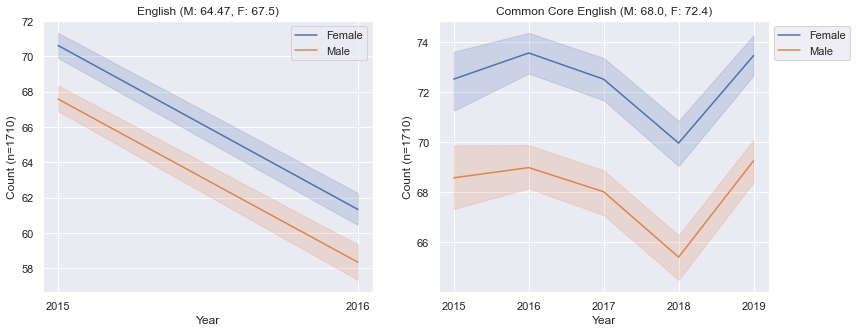

In [30]:
plt.figure(figsize = (13, 5))
sns.set(style="darkgrid")

test_names = ['English', 'Common Core English']

for index in range(1, 3):
    plt.subplot(1, 2, index)
    
    # Split the dataset by years and combine them in chronological order
    unordered = gender[gender['Regents Exam'] == test_names[index - 1]]
    years = np.sort(unordered['Year'].unique())
    subset_list = []
    for year in years:
        subset_list.append(unordered[unordered['Year'].isin([year])])
    ordered = pd.concat(subset_list, axis = 0)
    
    # Graph the data
    graph = sns.lineplot(data = ordered, x = 'Year', y = 'Mean Score', hue = 'Category', hue_order = ['Female', 'Male'])  
    male_scores = ordered[ordered['Category'] == 'Male']
    male_avg = round(male_scores['Mean Score'].mean(), 2)
    female_scores = ordered[ordered['Category'] == 'Female']
    female_avg = round(female_scores['Mean Score'].mean(), 2)
    plt.title(f'{test_names[index - 1]} (M: {male_avg}, F: {female_avg})')
    plt.ylabel(f'Count (n={len(test)})')
    plt.legend(bbox_to_anchor = (1,1))

plt.subplots_adjust(hspace = 0.5)

Based on the data, females performed better than males on average on the English exams. The difference is greater than the difference on the math exams.

## College Readiness by Gender
Let's visualize the college readiness of females and males. I'll use the Kruskal-Wallis test to check for statistical significance, because the math college readiness distribution is very skewed. I hope I'm making my former statistics professor proud :)

In [31]:
gender = gender.dropna(axis = 0, subset = ['Percent Scoring CR'])

In [32]:
# Separate the ELA and math college readiness
math_names = ['Integrated Algebra', 'Common Core Algebra', 'Algebra2/Trigonometry', 'Common Core Algebra2', 
              'Geometry', 'Common Core Geometry']
ela_names = ['English', 'Common Core English']

gender_math = gender[gender['Regents Exam'].isin(math_names)]
gender_ela = gender[gender['Regents Exam'].isin(ela_names)]
        
print(gender_ela['Regents Exam'].unique(), gender_math['Regents Exam'].unique())

['Common Core English' 'English'] ['Integrated Algebra' 'Common Core Algebra' 'Common Core Algebra2'
 'Common Core Geometry' 'Algebra2/Trigonometry' 'Geometry']


The Kruskal-Wallis results for English college readiness between male and female students are statistic=185.14286001547157 and  pvalue=3.6526703422264936e-42
The Kruskal-Wallis results for Math college readiness between male and female students are statistic=8.11601176918668 and  pvalue=0.004387597798847456


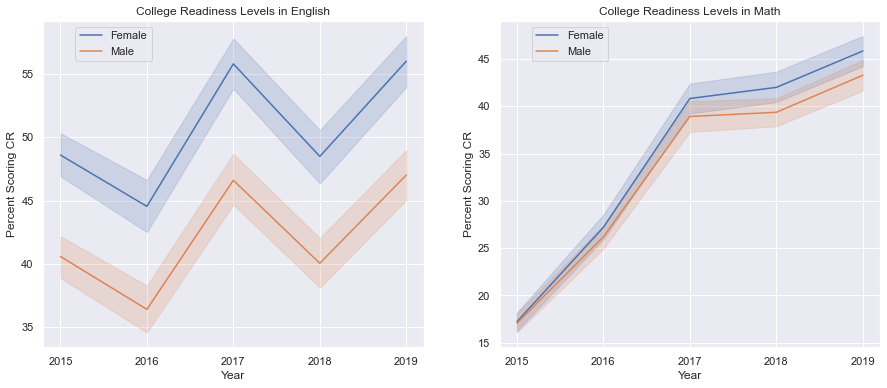

In [33]:
datasets = [gender_ela, gender_math]
subjects = ['English', 'Math']

plt.figure(figsize = (15, 6))
for index in range(1, 3):
    plt.subplot(1, 2, index)
    
    # Split the dataset by years and combine them in chronological order
    unordered = datasets[index - 1]
    years = np.sort(unordered['Year'].unique())
    subset_list = []
    for year in years:
        subset_list.append(unordered[unordered['Year'].isin([year])])
    ordered = pd.concat(subset_list, axis = 0)
        
    sns.lineplot(data = ordered, x = 'Year', y = 'Percent Scoring CR', hue = 'Category', hue_order = ['Female', 'Male'])
    plt.title(f'College Readiness Levels in {subjects[index - 1]}')
    plt.legend(bbox_to_anchor = (0.3,1))
    
    # Use the Kruskal-Wallis test to compare males vs females
    male = ordered[ordered['Category'] == 'Male']
    female = ordered[ordered['Category'] == 'Female']
    male = np.array(male['Percent Scoring CR'])
    female = np.array(female['Percent Scoring CR'])
    results = str(stats.kruskal(male, female, nan_policy = 'omit'))
    results = results.split('(')[1]
    results = results.strip(')')
    results = results.split(',')
    print(f'The Kruskal-Wallis results for {subjects[index - 1]} college readiness between male and female students are {results[0]} and {results[1]}')

The graphs show that females consistently surpassed males in terms of college readiness in terms of English and math skills (despite the minor difference in their math Regents grades). The Kruskal-Wallis tests indicate that females outperformed males in English and math with p-values of 3.65e-42 and 0.0044, respectively. Using a threshold of 0.05 for significance, the differences were not due to random chance. Females were better! 

## Results by SWD
Time to analyze trends in Regents results between General Eduation and Special Education students.

In [34]:
swd = pd.read_csv('Data by SWD.csv')
swd = swd.drop_duplicates()
swd = swd.drop(['School DBN', 'School Name', 'School Type', 'Total Tested',
                'Number Scoring Below 65', 'Percent Scoring Below 65', 'Number Scoring 65 or Above',
                'Number Scoring 80 or Above', 'Percent Scoring 80 or Above', 'Number Scoring CR', 'Unnamed: 0'], axis = 1)
swd = swd[swd['School Level'].isin(['High school', 'Secondary School'])]
swd = swd.dropna(axis = 0, subset = ['Mean Score'])
swd.head()

,School Level,Regents Exam,Year,Category,Mean Score,Percent Scoring 65 or Above,Percent Scoring CR
49,High school,Algebra2/Trigonometry,2015,Non-SWD,s,s,s
50,High school,Chinese,2015,Non-SWD,s,s,s
51,High school,Common Core Algebra,2015,Non-SWD,s,s,s
52,High school,Common Core Algebra,2015,SWD,s,s,s
53,High school,Common Core English,2015,SWD,58.7,50.0,16.7


In [35]:
num_columns = ['Mean Score', 'Percent Scoring 65 or Above', 'Percent Scoring CR']
for name in num_columns:
    column = swd[name].replace('na', np.nan)
    column = column.replace('s', np.nan)
    swd[name] = column.astype('float64')
swd['Year'] = swd['Year'].astype('str')
swd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49626 entries, 49 to 58688
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   School Level                 49626 non-null  object 
 1   Regents Exam                 49626 non-null  object 
 2   Year                         49626 non-null  object 
 3   Category                     49626 non-null  object 
 4   Mean Score                   34561 non-null  float64
 5   Percent Scoring 65 or Above  34561 non-null  float64
 6   Percent Scoring CR           15669 non-null  float64
dtypes: float64(3), object(4)
memory usage: 3.0+ MB


As a former science teacher, I want to compare performances on the science Regents.

## Science Performance by SWD

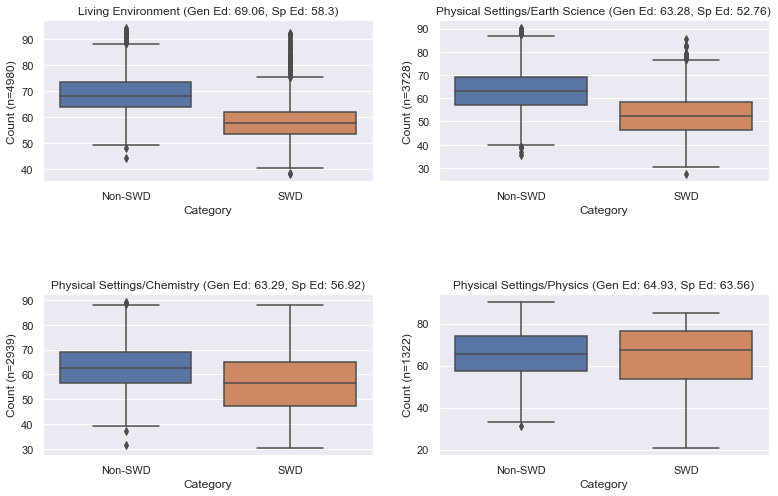

In [36]:
plt.figure(figsize = (13, 8))

test_names = ['Living Environment', 'Physical Settings/Earth Science', 'Physical Settings/Chemistry', 'Physical Settings/Physics']
for index in range(1, 5):
    plt.subplot(2, 2, index)
    test = swd[swd['Regents Exam'] == test_names[index - 1]]
    sns.boxplot(data = test, x = 'Category', y = 'Mean Score', order = ['Non-SWD', 'SWD'])    
    GE = test[test['Category'] == 'Non-SWD']
    GE_avg = round(GE['Mean Score'].mean(), 2)
    SE = test[test['Category'] == 'SWD']
    SE_avg = round(SE['Mean Score'].mean(), 2)
    plt.title(f'{test_names[index - 1]} (Gen Ed: {GE_avg}, Sp Ed: {SE_avg})')
    plt.ylabel(f'Count (n={len(test)})')

plt.subplots_adjust(hspace = 0.7)

On average, Special Education students performed worse than General Education students. The lower average performance of Special Education students reminds me of my prior teaching experiences. As a teacher, it's very important to not assume a student with a disability will perform worse than a student without a disability. The Living Environment and Earth Science boxplot shows outliers above the higher end, meaning that many students with disabilities can perform equally as well, if not better, than the average General Education students. It's important for educators, families, and students to understand that the negative effects of a disability on learning can be reduced, if given the proper resources and effort.

The difference between General and Special Education students is much smaller for the Physics exams than the other 3 exams. Based on the spread of the data, Special Education students almost matched the performance of the General Education students on the Physics exams, on average. The Special Education distribution was more left skewed, thus resulting in a lower average on the Physics test.

## Math Performance by SWD

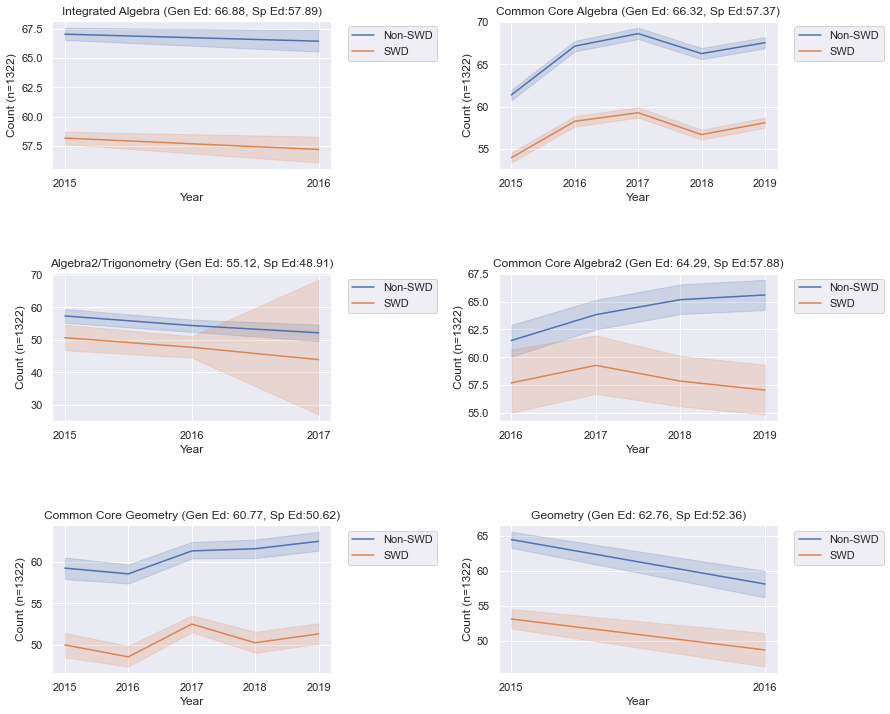

In [37]:
plt.figure(figsize = (13, 12))

test_names = ['Integrated Algebra', 'Common Core Algebra', 'Algebra2/Trigonometry', 'Common Core Algebra2',
             'Common Core Geometry', 'Geometry']
for index in range(1, 7):
    plt.subplot(3, 2, index)
    
    # Split the dataset by years and combine them in chronological order
    unordered = swd[swd['Regents Exam'] == test_names[index - 1]]
    years = np.sort(unordered['Year'].unique())
    subset_list = []
    for year in years:
        subset_list.append(unordered[unordered['Year'].isin([year])])
    ordered = pd.concat(subset_list, axis = 0)
    
    sns.lineplot(data = ordered, x = 'Year', y = 'Mean Score', hue = 'Category', hue_order = ['Non-SWD', 'SWD'], 
                 style_order = ['Non-SWD', 'SWD'])
    GE = ordered[ordered['Category'] == 'Non-SWD']
    GE_avg = round(GE['Mean Score'].mean(), 2)
    SE = ordered[ordered['Category'] == 'SWD']
    SE_avg = round(SE['Mean Score'].mean(), 2)
    plt.title(f'{test_names[index - 1]} (Gen Ed: {GE_avg}, Sp Ed:{SE_avg})')
    plt.ylabel(f'Count (n={len(test)})')
    plt.legend(bbox_to_anchor = (1.4,1))
    
plt.subplots_adjust(wspace = 0.6, hspace = 0.7)

## English Performance by SWD

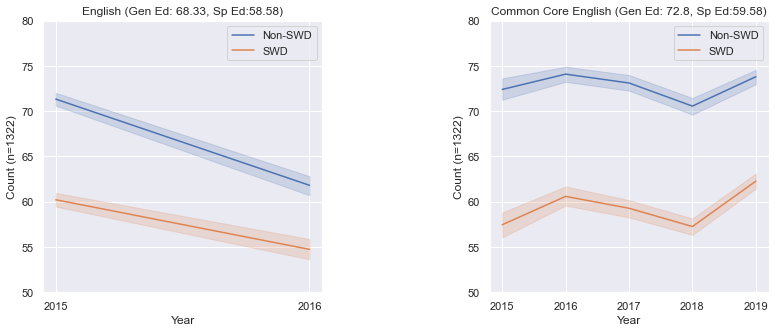

In [38]:
plt.figure(figsize = (13, 5))

test_names = ['English', 'Common Core English']
for index in range(1, 3):
    plt.subplot(1, 2, index)

    unordered = swd[swd['Regents Exam'] == test_names[index - 1]]
    years = np.sort(unordered['Year'].unique())
    subset_list = []
    for year in years:
        subset_list.append(unordered[unordered['Year'].isin([year])])
    ordered = pd.concat(subset_list, axis = 0)
    
    sns.lineplot(data = ordered, x = 'Year', y = 'Mean Score', hue = 'Category', hue_order = ['Non-SWD', 'SWD'], 
                 style_order = ['Non-SWD', 'SWD'])
    GE = ordered[ordered['Category'] == 'Non-SWD']
    GE_avg = round(GE['Mean Score'].mean(), 2)
    SE = ordered[ordered['Category'] == 'SWD']
    SE_avg = round(SE['Mean Score'].mean(), 2)
    plt.title(f'{test_names[index - 1]} (Gen Ed: {GE_avg}, Sp Ed:{SE_avg})')
    plt.ylabel(f'Count (n={len(test)})')
    plt.ylim(50, 80)
    plt.legend(bbox_to_anchor = (1,1))
plt.subplots_adjust(wspace = 0.6, hspace = 0.7)

As predicted, students with disabilities performed worse than students without disabilities in English and math, on average. The gaps did not seem to close from 2015 to 2019 on the English and math exams.

## T-Test Comparison in English and Math by SWD

In [39]:
test_names = ['Integrated Algebra', 'Common Core Algebra', 'Algebra2/Trigonometry', 'Common Core Algebra2',
              'Geometry', 'Common Core Geometry', 'English', 'Common Core English']
for t in test_names:
    test = swd[swd['Regents Exam'] == t]    
    a = test[test['Category'] == 'Non-SWD']
    b = test[test['Category'] == 'SWD']
    a = np.array(a['Mean Score'])
    b = np.array(b['Mean Score'])
    results = str(stats.ttest_ind(a = a, b = b, nan_policy = 'omit'))
    results = results.split('(')[1]
    results = results.strip(')').strip(' ')
    results = results.split(',')
    print(f'The t-test results for {t} scores are {results[0]} and {results[1]}')

The t-test results for Integrated Algebra scores are statistic=25.518722177687355 and  pvalue=1.924396418326076e-113
The t-test results for Common Core Algebra scores are statistic=41.63060254331599 and  pvalue=2.0539e-319
The t-test results for Algebra2/Trigonometry scores are statistic=4.585714069635569 and  pvalue=5.581542272121959e-06
The t-test results for Common Core Algebra2 scores are statistic=9.571245056493163 and  pvalue=7.797528204566012e-21
The t-test results for Geometry scores are statistic=12.58631002633235 and  pvalue=2.399323734340224e-32
The t-test results for Common Core Geometry scores are statistic=26.042898003459083 and  pvalue=4.68959513481328e-132
The t-test results for English scores are statistic=20.115718700461773 and  pvalue=3.90812044039756e-78
The t-test results for Common Core English scores are statistic=43.11098597939102 and  pvalue=0.0


The t-tests above indicate that General Education students overall outperformed Special Education students on all the English and math Regents exams. This suggests that the difference in college readiness was large.

## College Readiness by SWD

In [40]:
swd = swd.dropna(axis = 0, subset = ['Percent Scoring CR'])

In [41]:
# Separate the ELA and math college readiness
math_names = ['Integrated Algebra', 'Common Core Algebra', 'Algebra2/Trigonometry', 'Common Core Algebra2',
              'Geometry', 'Common Core Geometry']
ela_names = ['English', 'Common Core English']

swd_math = swd[swd['Regents Exam'].isin(math_names)]
swd_ela = swd[swd['Regents Exam'].isin(ela_names)]
        
print(swd_ela['Regents Exam'].unique(), swd_math['Regents Exam'].unique())

['Common Core English' 'English'] ['Integrated Algebra' 'Common Core Algebra' 'Common Core Geometry'
 'Common Core Algebra2' 'Geometry' 'Algebra2/Trigonometry']


The Kruskal-Wallis results for English college readiness between Gen Ed and SPED students are statistic=1715.8709361148108 and  pvalue=0.0
The Kruskal-Wallis results for Math college readiness between Gen Ed and SPED students are statistic=1485.4108732604918 and  pvalue=0.0


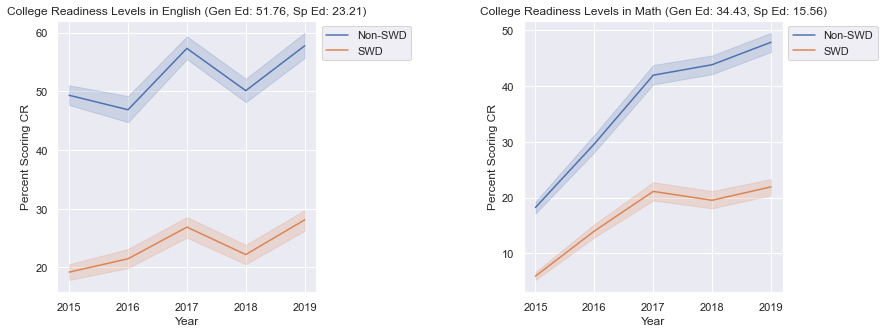

In [42]:
datasets = [swd_ela, swd_math]
subjects = ['English', 'Math']

plt.figure(figsize = (13, 5))
for index in range(1, 3):
    dataset = datasets[index - 1] 
    
    # Use a Kruskal-Wallis to compare gen ed and SPED
    gen = dataset[dataset['Category'] == 'Non-SWD']
    sped = dataset[dataset['Category'] == 'SWD']
    gen = gen['Percent Scoring CR']
    sped = sped['Percent Scoring CR']
    results = str(stats.kruskal(gen, sped, nan_policy = 'omit'))
    results = results.split('(')[1]
    results = results.strip(')')
    results = results.split(',')
    print(f'The Kruskal-Wallis results for {subjects[index - 1]} college readiness between Gen Ed and SPED students are {results[0]} and {results[1]}')
    
    plt.subplot(1, 2, index)
    unordered = dataset
    years = np.sort(unordered['Year'].unique())
    subset_list = []
    for year in years:
        subset_list.append(unordered[unordered['Year'].isin([year])])
    ordered = pd.concat(subset_list, axis = 0)
    
    sns.lineplot(data = ordered, x = 'Year', y = 'Percent Scoring CR', hue = 'Category', hue_order = ['Non-SWD', 'SWD'])
    gen_mean = round(gen.mean(), 2)
    sped_mean = round(sped.mean(), 2)
    plt.title(f'College Readiness Levels in {subjects[index - 1]} (Gen Ed: {gen_mean}, Sp Ed: {sped_mean})')
    plt.legend(bbox_to_anchor = (1,1))

plt.subplots_adjust(wspace = 0.8)

The college readiness between General Education and Special Education students differed quite a bit. On average, General Education students were approximately 28% more prepared in terms of English and approximately 19% more prepared in terms of math from 2015 to 2019. This is especially concerning, because over 70% SPED students were not prepared for college-level work. Unless the school system improves SPED services, this will place strain on the social and economic mobility of SPED students. The data suggests that much more work is needed to achieve equitable instruction for Special Education students.

## Results by ELL
Let's see how ELL students performed in 2015 to 2019. As a former ELL, I'm especially curious.

In [43]:
ell = pd.read_csv('Data by ELL.csv')
ell = ell.drop_duplicates()
ell = ell.drop(['School DBN', 'School Name', 'School Type', 'Total Tested',
                'Number Scoring Below 65', 'Percent Scoring Below 65', 'Number Scoring 65 or Above',
                'Number Scoring 80 or Above', 'Percent Scoring 80 or Above', 'Number Scoring CR', 'Unnamed: 0'], axis = 1)
ell = ell[ell['School Level'].isin(['High school', 'Secondary School'])]
ell = ell.dropna(axis = 0, subset = ['Mean Score'])
ell.head()

,School Level,Regents Exam,Year,Category,Mean Score,Percent Scoring 65 or Above,Percent Scoring CR
65,High school,Algebra2/Trigonometry,2015,ELL,s,s,s
66,High school,Algebra2/Trigonometry,2015,English Proficient,s,s,s
67,High school,Algebra2/Trigonometry,2015,Former ELL,s,s,s
68,High school,Chinese,2015,Former ELL,s,s,s
69,High school,Common Core Algebra,2015,ELL,s,s,s


In [44]:
num_columns = ['Mean Score', 'Percent Scoring 65 or Above', 'Percent Scoring CR']
for name in num_columns:
    column = ell[name].replace('na', np.nan)
    column = column.replace('s', np.nan)
    ell[name] = column.astype('float64')
ell['Year'] = ell['Year'].astype('str')
ell.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70862 entries, 65 to 82766
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   School Level                 70862 non-null  object 
 1   Regents Exam                 70862 non-null  object 
 2   Year                         70862 non-null  object 
 3   Category                     70862 non-null  object 
 4   Mean Score                   44432 non-null  float64
 5   Percent Scoring 65 or Above  44432 non-null  float64
 6   Percent Scoring CR           19988 non-null  float64
dtypes: float64(3), object(4)
memory usage: 4.3+ MB


## English Performance by ELL

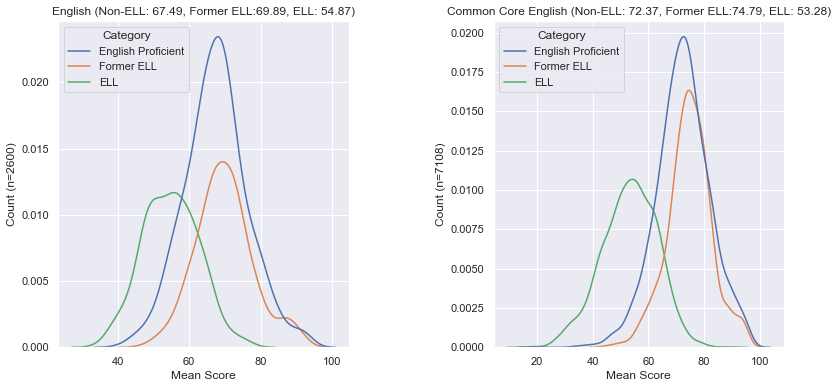

In [45]:
plt.figure(figsize = (13, 6))

test_names = ['English', 'Common Core English']

for index in range(1, 3):
    plt.subplot(1, 2, index)
    test = ell[ell['Regents Exam'] == test_names[index - 1]]
    sns.kdeplot(data = test, x = 'Mean Score', hue = 'Category',
                hue_order = ['English Proficient', 'Former ELL', 'ELL'])
    proficient = test[test['Category'] == 'English Proficient']
    proficient_avg = round(proficient['Mean Score'].mean(), 2)
    former_ELL = test[test['Category'] == 'Former ELL']
    former_ELL_avg = round(former_ELL['Mean Score'].mean(), 2)
    ELL = test[test['Category'] == 'ELL']
    ELL_avg = round(ELL['Mean Score'].mean(), 2)
    plt.title(f'{test_names[index - 1]} (Non-ELL: {proficient_avg}, Former ELL:{former_ELL_avg}, ELL: {ELL_avg})')
    plt.ylabel(f'Count (n={len(test)})')
    
plt.subplots_adjust(wspace = 0.5)

ELL classification is usually for students whose native language is not English. Growing up with a language barrier, I was nervous when I had to speak in class. I would get anxious about reading out loud, asking for questions, or getting pointed out that I incorrectly enunciated a word. I eventually tested out of ELL in 7th grade by passing the NYSESLAT, which assesses an ELL student's reading and writing proficiency. It was a pain, but I did better than my peers even since I became fluent in English. It's interesting that my story is reflected in the data. The former ELL students outperformed native English speakers and ELL students in English, as indicated by the more rightward peaks of the former ELL's curves.

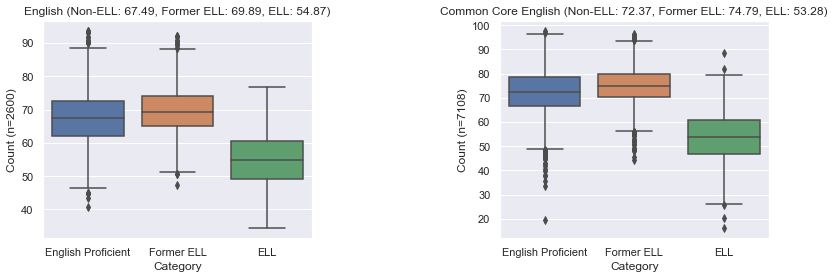

In [46]:
plt.figure(figsize = (13, 4))

test_names = ['English', 'Common Core English']
for index in range(1, 3):
    plt.subplot(1, 2, index)
    test = ell[ell['Regents Exam'] == test_names[index - 1]]
    sns.boxplot(data = test, x = 'Category', y = 'Mean Score', order = ['English Proficient', 'Former ELL', 'ELL'])
    proficient = test[test['Category'] == 'English Proficient']
    proficient_avg = round(proficient['Mean Score'].mean(), 2)
    former_ELL = test[test['Category'] == 'Former ELL']
    former_ELL_avg = round(former_ELL['Mean Score'].mean(), 2)
    ELL = test[test['Category'] == 'ELL']
    ELL_avg = round(ELL['Mean Score'].mean(), 2)
    plt.title(f'{test_names[index - 1]} (Non-ELL: {proficient_avg}, Former ELL: {former_ELL_avg}, ELL: {ELL_avg})')
    plt.ylabel(f'Count (n={len(test)})')

plt.subplots_adjust(wspace = 0.7, hspace = 0.7)

It's interesting to see that the native English speaker group had lower outliers than the former ELL group. Native English speakers are not commonly perceived to need English intervention support, but I think many of them would benefit from it. I actually had a friend who grew up speaking English in the city, but he needed ELL services. I wonder whether there is an underdiagnosis of students who need English intervention in the native speakers population.


## Math Performance by ELL

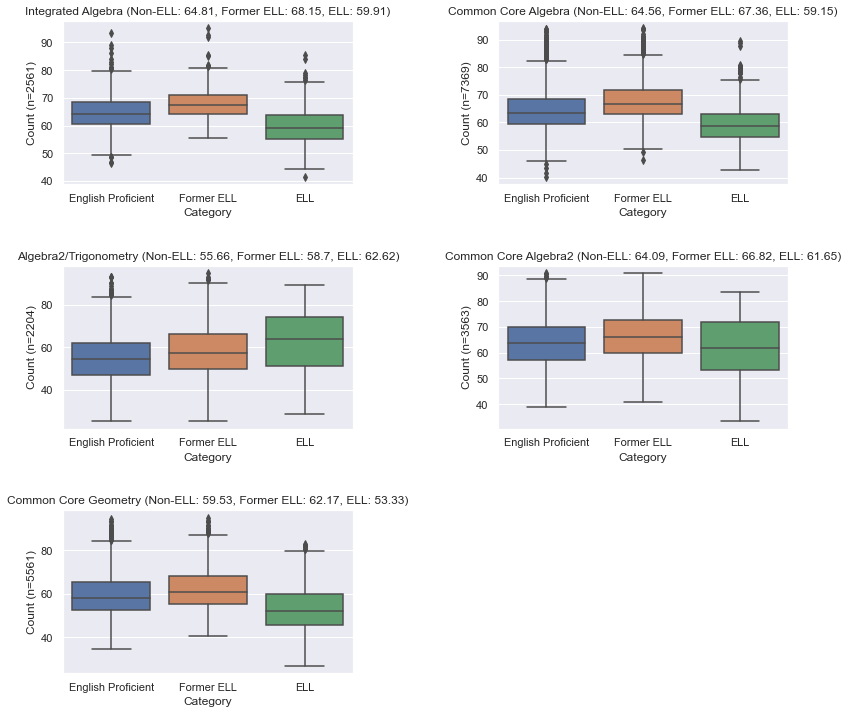

In [47]:
plt.figure(figsize = (13, 12))

test_names = ['Integrated Algebra', 'Common Core Algebra', 'Algebra2/Trigonometry', 'Common Core Algebra2',
             'Common Core Geometry']

for index in range(1, 6):
    plt.subplot(3, 2, index)
    test = ell[ell['Regents Exam'] == test_names[index - 1]]
    sns.boxplot(data = test, x = 'Category', y = 'Mean Score', order = ['English Proficient', 'Former ELL', 'ELL'])
    proficient = test[test['Category'] == 'English Proficient']
    proficient_avg = round(proficient['Mean Score'].mean(), 2)
    former_ELL = test[test['Category'] == 'Former ELL']
    former_ELL_avg = round(former_ELL['Mean Score'].mean(), 2)
    ELL = test[test['Category'] == 'ELL']
    ELL_avg = round(ELL['Mean Score'].mean(), 2)
    plt.title(f'{test_names[index - 1]} (Non-ELL: {proficient_avg}, Former ELL: {former_ELL_avg}, ELL: {ELL_avg})')
    plt.ylabel(f'Count (n={len(test)})')
    
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)

It looks like the rankings are former ELL, native English speakers, and ELL students on the math Regents exams. As a note, it is interesting that the ELL surpassed former ELL and native speakers on the prior Algebra 2/Trigonometry test, but they performed the worst on the Common Core version. Not sure why that was the case.

## T-Test Comparison in English and Math

In [48]:
test_names = ['English', 'Common Core English', 'Integrated Algebra', 'Common Core Algebra', 'Algebra2/Trigonometry', 
              'Common Core Algebra2', 'Geometry', 'Common Core Geometry']

df = {'Group A': [], 'Group B': [], 'Subject': [], 't-statistic': [], 'p-value': []}

for t in test_names:
    test = ell[ell['Regents Exam'] == t]    
    
    native_speaker = test[test['Category'] == 'English Proficient']
    former_ELL = test[test['Category'] == 'Former ELL']
    ELL = test[test['Category'] == 'ELL']
    
    native_speaker = np.array(native_speaker['Mean Score'])
    former_ELL = np.array(former_ELL['Mean Score'])
    ELL = np.array(ELL['Mean Score'])
    
    native_speaker_vs_former_ELL = str(stats.ttest_ind(a = native_speaker, b = former_ELL, nan_policy = 'omit')).split('(')[1].strip(')').strip(' ').split(',')
    df['Group A'].append('Native Speaker')
    df['Group B'].append('Former ELL')
    df['Subject'].append(t)
    df['t-statistic'].append(native_speaker_vs_former_ELL[0])
    df['p-value'].append(native_speaker_vs_former_ELL[1])  
    
    native_speaker_vs_ELL = str(stats.ttest_ind(a = native_speaker, b = ELL, nan_policy = 'omit')).split('(')[1].strip(')').strip(' ').split(',')
    df['Group A'].append('Native Speaker')
    df['Group B'].append('ELL')
    df['Subject'].append(t)
    df['t-statistic'].append(native_speaker_vs_ELL[0])
    df['p-value'].append(native_speaker_vs_ELL[1])  
    
    former_ELL_vs_ELL = str(stats.ttest_ind(a = former_ELL, b = ELL, nan_policy = 'omit')).split('(')[1].strip(')').strip(' ').split(',')  
    df['Group A'].append('Former ELL')
    df['Group B'].append('ELL')
    df['Subject'].append(t)
    df['t-statistic'].append(former_ELL_vs_ELL[0])
    df['p-value'].append(former_ELL_vs_ELL[1])  

df = pd.DataFrame(df)
df

,Group A,Group B,Subject,t-statistic,p-value
0,Native Speaker,Former ELL,English,statistic=-4.388375320555013,pvalue=1.25614295635412e-05
1,Native Speaker,ELL,English,statistic=23.056066396972366,pvalue=1.691978690369376e-95
2,Former ELL,ELL,English,statistic=25.906953797512564,pvalue=2.8812784691179244e-106
3,Native Speaker,Former ELL,Common Core English,statistic=-8.017653996911571,pvalue=1.4311313039641341e-15
4,Native Speaker,ELL,Common Core English,statistic=57.37373600777426,pvalue=0.0
5,Former ELL,ELL,Common Core English,statistic=64.40479714381631,pvalue=0.0
6,Native Speaker,Former ELL,Integrated Algebra,statistic=-8.188821181350681,pvalue=7.933963293471611e-16
7,Native Speaker,ELL,Integrated Algebra,statistic=11.17492478722511,pvalue=2.3179425628999097e-27
8,Former ELL,ELL,Integrated Algebra,statistic=16.908193088582838,pvalue=2.320487819073941e-53
9,Native Speaker,Former ELL,Common Core Algebra,statistic=-11.640875391348287,pvalue=8.24450490478371e-31


The t-test results show that most of the differences in the scores were statistically significant, assuming a threshold p-value of 0.05. The t-statistics between native speakers and ELL and former ELL and ELL are 57.37 and 64.40 on the Common Core English Regents, respectively, while the t-statistics between these same groups are much lower for the math Regents. In other words, the score differences between ELL and non-ELL students are smaller on the math tests than on the English tests. This is probably due to the fact that math symbols and operations are the same worldwide. My high school Chemistry professor once told our class that her past ELL students did well on her tests despite a lack of English fluency, because "math is a universal language." No matter where you are in the world, math syntax is the same. The impact of the language barrier is less when it comes to math.

## College Readiness by ELL

In [49]:
ell = ell.dropna(axis = 0, subset = ['Percent Scoring CR'])

In [50]:
# Separate the ELA and math college readiness
math_names = ['Integrated Algebra', 'Common Core Algebra', 'Algebra2/Trigonometry', 'Common Core Algebra2',
              'Geometry', 'Common Core Geometry']
ela_names = ['English', 'Common Core English']

ell_ela = ell[ell['Regents Exam'].isin(ela_names)]
ell_math = ell[ell['Regents Exam'].isin(math_names)]

print(ell_ela['Regents Exam'].unique(), ell_math['Regents Exam'].unique())

['Common Core English' 'English'] ['Common Core Algebra' 'Geometry' 'Integrated Algebra'
 'Common Core Geometry' 'Common Core Algebra2' 'Algebra2/Trigonometry']


,Group A,Group B,Subject,H-statistic,p-value
0,Native Speaker,Former ELL,Common Core Geometry,statistic=44.67228850792124,pvalue=2.3293083182769505e-11
1,Native Speaker,ELL,Common Core Geometry,statistic=2027.7100184053365,pvalue=0.0
2,Former ELL,ELL,Common Core Geometry,statistic=1877.8048977404233,pvalue=0.0
3,Native Speaker,Former ELL,Common Core Geometry,statistic=186.2989763964969,pvalue=2.0427980078151818e-42
4,Native Speaker,ELL,Common Core Geometry,statistic=269.56951028137956,pvalue=1.4084222659752435e-60
5,Former ELL,ELL,Common Core Geometry,statistic=654.5852521131801,pvalue=2.2486120786982513e-144


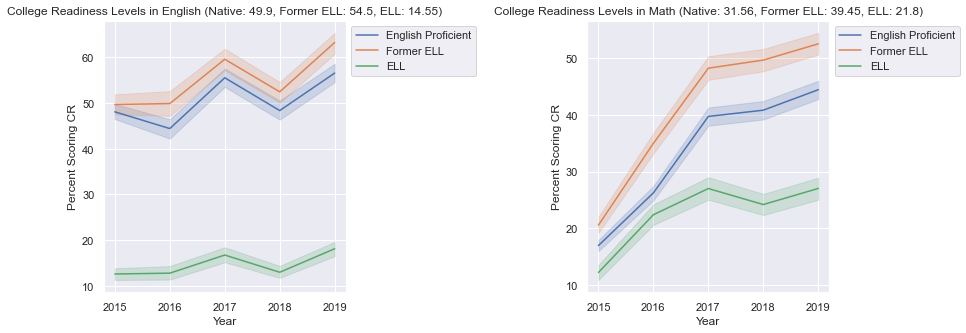

In [51]:
datasets = [ell_ela, ell_math]
subjects = ['English', 'Math']

df = {'Group A': [], 'Group B': [], 'Subject': [], 'H-statistic': [], 'p-value': []}

plt.figure(figsize = (13, 5))
for index in range(1, 3):
    dataset = datasets[index - 1] 
    
    # Use a Kruskal-Wallis to compare the 3 groups
    native_speaker = dataset[dataset['Category'] == 'English Proficient']
    former_ELL = dataset[dataset['Category'] == 'Former ELL']
    ELL = dataset[dataset['Category'] == 'ELL']
    
    native_speaker = native_speaker['Percent Scoring CR']
    former_ELL = former_ELL['Percent Scoring CR']
    ELL = ELL['Percent Scoring CR']
    
    native_speaker_vs_former_ELL = str(stats.kruskal(native_speaker, former_ELL, nan_policy = 'omit')).split('(')[1].strip(')').strip(' ').split(',')
    df['Group A'].append('Native Speaker')
    df['Group B'].append('Former ELL')
    df['Subject'].append(t)
    df['H-statistic'].append(native_speaker_vs_former_ELL[0])
    df['p-value'].append(native_speaker_vs_former_ELL[1])  
    
    native_speaker_vs_ELL = str(stats.kruskal(native_speaker, ELL, nan_policy = 'omit')).split('(')[1].strip(')').strip(' ').split(',')
    df['Group A'].append('Native Speaker')
    df['Group B'].append('ELL')
    df['Subject'].append(t)
    df['H-statistic'].append(native_speaker_vs_ELL[0])
    df['p-value'].append(native_speaker_vs_ELL[1])  
    
    former_ELL_vs_ELL = str(stats.kruskal(former_ELL, ELL, nan_policy = 'omit')).split('(')[1].strip(')').strip(' ').split(',')  
    df['Group A'].append('Former ELL')
    df['Group B'].append('ELL')
    df['Subject'].append(t)
    df['H-statistic'].append(former_ELL_vs_ELL[0])
    df['p-value'].append(former_ELL_vs_ELL[1])
        
    plt.subplot(1, 2, index)
    unordered = dataset
    years = np.sort(unordered['Year'].unique())
    subset_list = []
    for year in years:
        subset_list.append(unordered[unordered['Year'].isin([year])])
    ordered = pd.concat(subset_list, axis = 0)
    
    sns.lineplot(data = ordered, x = 'Year', y = 'Percent Scoring CR', hue = 'Category', 
                 hue_order = ['English Proficient', 'Former ELL', 'ELL'])
    native_mean = round(native_speaker.mean(), 2)
    former_mean = round(former_ELL.mean(), 2)
    ELL_mean = round(ELL.mean(), 2)
    plt.title(f'College Readiness Levels in {subjects[index - 1]} (Native: {native_mean}, Former ELL: '
              f'{former_mean}, ELL: {ELL_mean})')
    plt.legend(bbox_to_anchor = (1,1))

plt.subplots_adjust(wspace = 1)
df = pd.DataFrame(df)
df

The former ELL students were the most college ready in terms of English and math, followed by native English speakers. The ELL population's college readiness consistently stayed between 10% to 20% in English, and the math readiness increased from around 13% in 2015 to around 27% in 2019. I wish I could get age data on the ELL group, because age does affect how one readily learns a new language. I suspect that the older the ELL student, the lower their college readiness.

## College Readiness ELL vs SWD
The ELL population and the Special Education population share the lowest college readiness levels. Let's compare them.

In [52]:
only_ell_ela = ell_ela[ell_ela['Category'] == 'ELL']
only_swd_ela = swd_ela[swd_ela['Category'] == 'SWD']
ell_swd_ela = pd.concat([only_ell_ela, only_swd_ela], axis = 0)

only_ell_math = ell_math[ell_math['Category'] == 'ELL']
only_swd_math = swd_math[swd_math['Category'] == 'SWD']
ell_swd_math = pd.concat([only_ell_math, only_swd_math], axis = 0)

In [53]:
ell_swd_math.index = list(range(0, len(ell_swd_math)))
ell_swd_ela.index = list(range(0, len(ell_swd_ela)))

English
The Kruskal-Wallis results between ELL students and students with disabilities in college readiness are statistic=242.89277000285995 and  pvalue=9.203816373623898e-55

Math
The Kruskal-Wallis results between ELL students and students with disabilities in college readiness are statistic=183.4884942259547 and  pvalue=8.39034682389006e-42



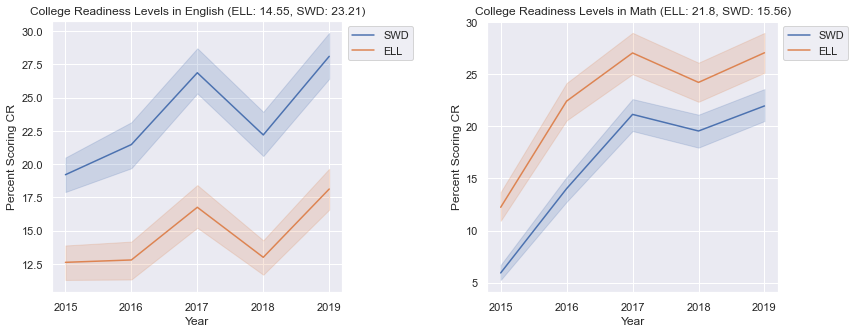

In [54]:
datasets = [ell_swd_ela, ell_swd_math]
subjects = ['English', 'Math']

plt.figure(figsize = (13, 5))
for index in range(1, 3):
    dataset = datasets[index - 1] 
    
    # Use a Kruskal-Wallis to compare ELL and SWD
    ELL = dataset[dataset['Category'] == 'ELL']
    SWD = dataset[dataset['Category'] == 'SWD']
    
    ELL = ELL['Percent Scoring CR']
    SWD = SWD['Percent Scoring CR']
    
    ELL_vs_SWD = str(stats.kruskal(ELL, SWD, nan_policy = 'omit')).split('(')[1].strip(')').strip(' ').split(',')
    
    print(f'{subjects[index - 1]}')
    print(f'The Kruskal-Wallis results between ELL students and students with disabilities in college readiness are '
          f'{ELL_vs_SWD[0]} and {ELL_vs_SWD[1]}')
    print()
        
    plt.subplot(1, 2, index)
    unordered = dataset
    years = np.sort(unordered['Year'].unique())
    subset_list = []
    for year in years:
        subset_list.append(unordered[unordered['Year'].isin([year])])
    ordered = pd.concat(subset_list, axis = 0)
    
    sns.lineplot(data = ordered, x = 'Year', y = 'Percent Scoring CR', hue = 'Category', hue_order = ['SWD', 'ELL'])
    ELL_mean = round(ELL.mean(), 2)
    SWD_mean = round(SWD.mean(), 2)    
    plt.title(f'College Readiness Levels in {subjects[index - 1]} (ELL: {ELL_mean}, SWD: {SWD_mean})')
    plt.legend(bbox_to_anchor = (1,1))
plt.subplots_adjust(wspace = 0.5)

According to the Kruskal-Wallis tests, ELL students were less prepared for college in terms of English, but they were better prepared for college math. This shouldn't be too surprising, ELL students' main obstacle is language acquisition and usage. Although we see gradual rise in math readiness since 2015 for both groups, English readiness was increasing much slower.

## Results by Ethnicity
It's time to analyze Regents by race/ethnicity. This is the last group of data aggregated by the source of the data.

In [55]:
ethnicity = pd.read_csv('Data by Ethnicity.csv')
ethnicity = ethnicity.drop_duplicates()
ethnicity = ethnicity.drop(['School DBN', 'School Name', 'School Type', 'Total Tested',
                            'Number Scoring Below 65', 'Percent Scoring Below 65', 'Number Scoring 65 or Above',
                            'Number Scoring 80 or Above', 'Percent Scoring 80 or Above', 'Number Scoring CR', 
                            'Unnamed: 0'], axis = 1)
ethnicity = ethnicity[ethnicity['School Level'].isin(['High school', 'Secondary School'])]
ethnicity = ethnicity.dropna(axis = 0, subset = ['Mean Score'])
ethnicity.head()

,School Level,Regents Exam,Year,Category,Mean Score,Percent Scoring 65 or Above,Percent Scoring CR
89,High school,Algebra2/Trigonometry,2015,Black,s,s,s
90,High school,Algebra2/Trigonometry,2015,Asian,s,s,s
91,High school,Chinese,2015,Asian,s,s,s
92,High school,Common Core Algebra,2015,White,s,s,s
93,High school,Common Core Algebra,2015,Asian,s,s,s


In [56]:
num_columns = ['Mean Score', 'Percent Scoring 65 or Above', 'Percent Scoring CR']
for name in num_columns:
    column = ethnicity[name].replace('na', np.nan)
    column = column.replace('s', np.nan)
    ethnicity[name] = column.astype('float64')
ethnicity['Year'] = ethnicity['Year'].astype('str')
ethnicity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105381 entries, 89 to 123608
Data columns (total 7 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   School Level                 105381 non-null  object 
 1   Regents Exam                 105381 non-null  object 
 2   Year                         105381 non-null  object 
 3   Category                     105381 non-null  object 
 4   Mean Score                   55503 non-null   float64
 5   Percent Scoring 65 or Above  55503 non-null   float64
 6   Percent Scoring CR           25575 non-null   float64
dtypes: float64(3), object(4)
memory usage: 6.4+ MB


In [57]:
ethnicity.Category.unique()

array(['Black', 'Asian', 'White',
       'Multiple Race Categories Not Represented', 'Hispanic'],
      dtype=object)

The last category might contain multiracial students, Pacific Islander, or another ethnic group. For brevity, let's rename it to "Other Ethnicity".

In [58]:
ethnicity = ethnicity.replace('Multiple Race Categories Not Represented', 'Other Ethnicity')

In [59]:
ethnicity.Category.unique()

array(['Black', 'Asian', 'White', 'Other Ethnicity', 'Hispanic'],
      dtype=object)

## Math Performance by Ethnicity

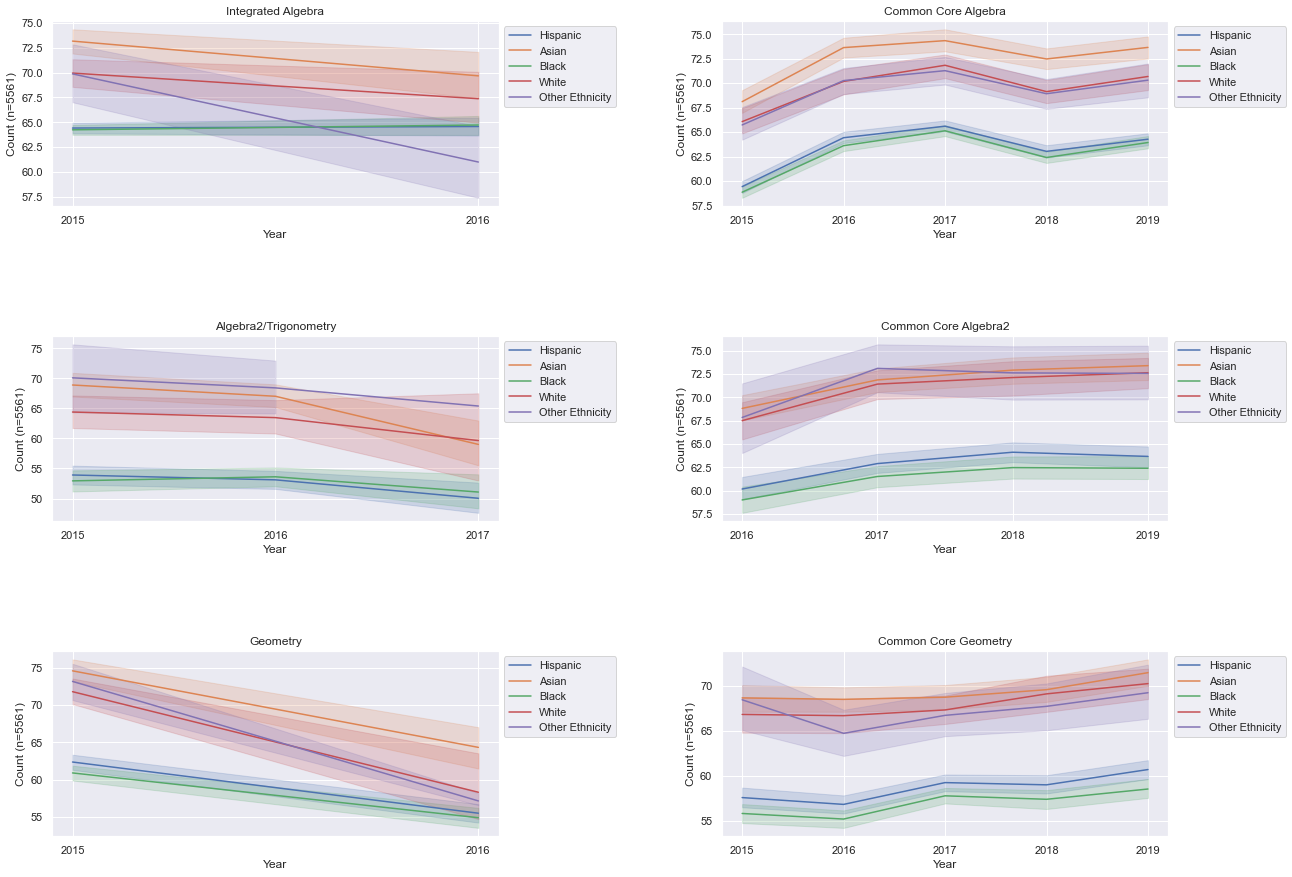

In [60]:
plt.figure(figsize = (20, 15))

test_names = ['Integrated Algebra', 'Common Core Algebra', 'Algebra2/Trigonometry', 'Common Core Algebra2', 
              'Geometry', 'Common Core Geometry']

for index in range(1, 7):
    plt.subplot(3, 2, index)
    unordered = ethnicity[ethnicity['Regents Exam'] == test_names[index - 1]]
    years = np.sort(unordered['Year'].unique())
    subset_list = []
    for year in years:
        subset_list.append(unordered[unordered['Year'].isin([year])])
    ordered = pd.concat(subset_list, axis = 0)
    
    sns.lineplot(data = ordered, x = 'Year', y = 'Mean Score', hue = 'Category', 
                 hue_order = ['Hispanic', 'Asian', 'Black', 'White', 'Other Ethnicity'])    
    plt.title(f'{test_names[index - 1]}')
    plt.ylabel(f'Count (n={len(test)})')
    plt.legend(bbox_to_anchor = (1,1))

plt.subplots_adjust(wspace = 0.5, hspace = 0.7)

Based on the graphs above, all ethncities scored lower in 2016 compared to 2015 on the old math Regents exams. However, they increased steadily since the Common Core tests was administered. The top math scorers were Asian, White, or Other Ethnicity on the Common Core exams from 2015 to 2019. The Black and Hispanic populations had considerably lower scores.

## English Performance by Ethnicity

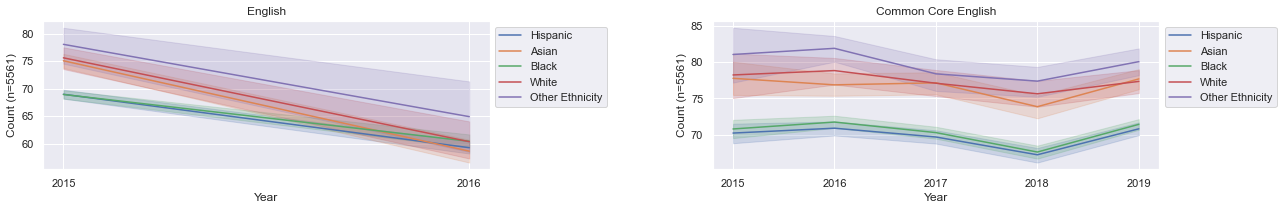

In [61]:
plt.figure(figsize = (20, 12))

test_names = ['English', 'Common Core English']

for index in range(1, 3):
    plt.subplot(3, 2, index)
    unordered = ethnicity[ethnicity['Regents Exam'] == test_names[index - 1]]
    years = np.sort(unordered['Year'].unique())
    subset_list = []
    for year in years:
        subset_list.append(unordered[unordered['Year'].isin([year])])
    ordered = pd.concat(subset_list, axis = 0)
    
    sns.lineplot(data = ordered, x = 'Year', y = 'Mean Score', hue = 'Category', 
                 hue_order = ['Hispanic', 'Asian', 'Black', 'White', 'Other Ethnicity'])    
    plt.title(f'{test_names[index - 1]}')
    plt.ylabel(f'Count (n={len(test)})')
    plt.legend(bbox_to_anchor = (1,1))

plt.subplots_adjust(wspace = 0.5, hspace = 0.7)

It appears that the Other Ethnicity group performed the best on both the old English Regents and the Common Core English Regents. I wish I have more data about the specific ethnicities within the Other Ethnicity group.

## College Readiness by Ethnicity

In [62]:
ethnicity = ethnicity.dropna(axis = 0, subset = ['Percent Scoring CR'])

In [63]:
# Separate the ELA and math college readiness
math_names = ['Integrated Algebra', 'Common Core Algebra', 'Algebra2/Trigonometry', 'Common Core Algebra2',
              'Geometry', 'Common Core Geometry']
ela_names = ['English', 'Common Core English']

ethnicity_ela = ethnicity[ethnicity['Regents Exam'].isin(ela_names)]
ethnicity_math = ethnicity[ethnicity['Regents Exam'].isin(math_names)]
        
print(ethnicity_ela['Regents Exam'].unique(), ethnicity_math['Regents Exam'].unique())

['Common Core English' 'English'] ['Common Core Algebra' 'Geometry' 'Integrated Algebra'
 'Common Core Geometry' 'Algebra2/Trigonometry' 'Common Core Algebra2']


,Group A,Group B,Subject,H-statistic,p-value
0,Hispanic,Asian,English,statistic=328.70599631391116,pvalue=1.8391821391049025e-73
1,Hispanic,Black,English,statistic=0.023632656381445585,pvalue=0.8778232872404026
2,Hispanic,White,English,statistic=328.5360146711344,pvalue=2.0028454264304707e-73
3,Hispanic,Other,English,statistic=305.72279876883437,pvalue=1.866400244705991e-68
4,Asian,Black,English,statistic=335.3496751561037,pvalue=6.571263285364687e-75
5,Asian,White,English,statistic=3.3959146344654463,pvalue=0.0653581060807819
6,Asian,Other,English,statistic=28.53893635360907,pvalue=9.183306146212191e-08
7,Black,White,English,statistic=334.62948071246973,pvalue=9.429772239111818e-75
8,Black,Other,English,statistic=315.9000695527299,pvalue=1.132328948182014e-70
9,White,Other,English,statistic=13.935860409169521,pvalue=0.00018915508735735989


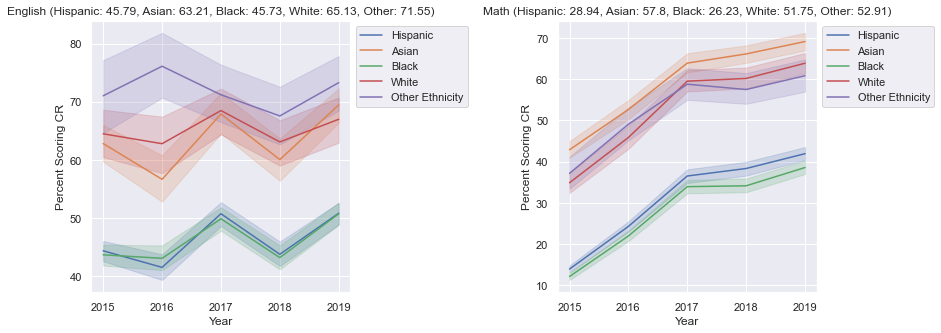

In [64]:
datasets = [ethnicity_ela, ethnicity_math]
subjects = ['English', 'Math']

plt.figure(figsize = (13, 5))

df = {'Group A': [], 'Group B': [], 'Subject': [], 'H-statistic': [], 'p-value': []}

for index in range(1, 3):
    dataset = datasets[index - 1] 
    
    # Use a Kruskal-Wallis to compare across ethnicities
    hispanic = dataset[dataset['Category'] == 'Hispanic']
    asian = dataset[dataset['Category'] == 'Asian']
    black = dataset[dataset['Category'] == 'Black']
    white = dataset[dataset['Category'] == 'White']
    other = dataset[dataset['Category'] == 'Other Ethnicity']


    hispanic = hispanic['Percent Scoring CR']
    asian = asian['Percent Scoring CR']
    black = black['Percent Scoring CR']
    white = white['Percent Scoring CR']
    other = other['Percent Scoring CR']
    
    pairs = [[hispanic, asian, 'Hispanic', 'Asian'], [hispanic, black, 'Hispanic', 'Black'], 
             [hispanic, white, 'Hispanic', 'White'], [hispanic, other, 'Hispanic', 'Other'], 
             [asian, black, 'Asian', 'Black'], [asian, white, 'Asian', 'White'], [asian, other, 'Asian', 'Other'], 
             [black, white, 'Black', 'White'], [black, other, 'Black', 'Other'], [white, other, 'White', 'Other']]
        
    for pair in pairs:
        results = str(stats.kruskal(pair[0], pair[1], nan_policy = 'omit')).split('(')[1].strip(')').strip(' ').split(',')
        df['Group A'].append(pair[2])
        df['Group B'].append(pair[3])
        df['Subject'].append(subjects[index - 1])
        df['H-statistic'].append(results[0])
        df['p-value'].append(results[1])
        
    plt.subplot(1, 2, index)
    unordered = dataset
    years = np.sort(unordered['Year'].unique())
    subset_list = []
    for year in years:
        subset_list.append(unordered[unordered['Year'].isin([year])])
    ordered = pd.concat(subset_list, axis = 0)
    
    sns.lineplot(data = ordered, x = 'Year', y = 'Percent Scoring CR', hue = 'Category', 
                 hue_order = ['Hispanic', 'Asian', 'Black', 'White', 'Other Ethnicity'])
    hispanic_mean = round(hispanic.mean(), 2)
    asian_mean = round(asian.mean(), 2)    
    black_mean = round(black.mean(), 2)    
    white_mean = round(white.mean(), 2)    
    other_mean = round(other.mean(), 2)    
    
    plt.title(f'{subjects[index - 1]} (Hispanic: {hispanic_mean}, Asian: {asian_mean}, Black: {black_mean}, ' 
              f'White: {white_mean}, Other: {other_mean})')
    plt.legend(bbox_to_anchor = (1,1))
    
plt.subplots_adjust(wspace = 0.8)

df = pd.DataFrame(df)
df

The graphs show that the Other Ethnicity group had the highest literacy skills for college, and the Kruskal-Wallis test results indicate that the differences are statistically significant, assuming a threshold level of 0.05. This makes me even more curious about the specific ethinicities in this group, but I unfortunately don't have that information. Meanwhile, Asians were the most prepared for college math, as indicated by all the p-values less than 0.05. The group least prepared for college math were Black students, and the groups least prepared in terms of English were Black and Hispanic (no statistically significant difference between the two groups). The lower performances of Black and Hispanic students were due to the effects of systemic inequities in the education system and the larger society. Work must be done to improve resources (higher funding, more qualified teachers, more educational resources, etc.) on a school-level and community-level for Black and Hispanic communities to yield better educational results.

# Main Findings
On average, high schools scored in the 60s on Regents exams in English, math, science, and history between 2015 and 2019. The college readiness levels of students were determined by their English and math scores. The median percentage of students who were English-proficient for college were below 50% until 2019, while the median percentage for math proficiency ranged from less than 10% in 2015 to 39% in 2019. There are clear increases in college readiness, but the percentages are still relatively low.

When analyzing performance between males and females, females are more prepared than males for college in terms of literacy and math skills. The difference in college readiness was even greater between General Education and Special Education students. The average differences from 2015 to 2019 in math and English were 19% and 28%, respectively. When comparing performances across ELL groups, former ELL students outperformed native English speakers and ELL students in literacy and math. The average college readiness level difference between non-ELL students (former ELL and native English speakers) and ELL students was over 30% in English and roughly 10% in math from 2015 to 2019. A disparity was also found between non-Hispanic and non-Black students and Hispanic and Black students. In general, roughly 50% of high school students were not ready for college in terms of literacy in 2019 and roughly 60% were not ready for college math in 2019 despite gradual increases from 2015 to 2019.

As a note, I removed all data from schools that were labelled "K-12" to prevent potential inclusion of middle school data. Although this subset accounts for about 5% of the total available high school data, this analysis has margins of error.

I only worked as a teacher for 3 years in NYC, so my experiences are minimal compared to veterans in the field. What I've learned is that a student's performance is determined by not only the quality of their teachers' instruction, but also factors outside of school (family's income level, student's housing conditions, student's relationships with families, amount of parental care, and so many more). Outside factors have a direct impact on a student's motivation and feelings towards school. Of course, schools still need much more funding to improve resources for students and start educational initiatives, such as more tutoring programs and more relevant curriculum. Teachers can provide insight into educational policies and pressing issues in the schools, so principals, superintendents, and those higher-up should seek feedback from those teaching in the front lines to design and implement practical policies that enhance learning outcomes.

Analysis of this dataset took quite a bit of time, and I hope I did a decent job going through it and interpreting. Thank you for reading!

## References
I used multiple resources to help me write the code and know which statistical test to use. Any opinion or statement in this analysis does not reflect the opinion of the individuals and entities in the following references.

AlextheAnalyst. (2021). "Data Analyst Portfolio Project | Correlation in Python | Project 4/4". Available at https://www.youtube.com/watch?v=iPYVYBtUTyE

OneCricketeer & FdoBad. (2021). "ValueError: invalid literal for int() with base 10: "". Available at https://stackoverflow.com/questions/1841565/valueerror-invalid-literal-for-int-with-base-10

bfontaine & R.Sanchez. (2018). "Inserting a Link to a Webpage in an IPython Notebook". Available at https://stackoverflow.com/questions/25692293/inserting-a-link-to-a-webpage-in-an-ipython-notebook

bioST@TS. " Comparing two means – Kruskal-Wallis test". Available at https://biostats.w.uib.no/comparing-two-means-kruskal-wallis-test/

GeeksforGeeks. (2021). "How to Adjust Number of Ticks in Seaborn Plots?". Available at https://www.geeksforgeeks.org/how-to-adjust-number-of-ticks-in-seaborn-plots/

JD Long. (2014). "Adding null values to a pandas dataframe". Available at https://stackoverflow.com/questions/26805445/adding-null-values-to-a-pandas-dataframe

jezrael. (2019). "How to speed up pandas drop() method?" Available at https://stackoverflow.com/questions/57392878/how-to-speed-up-pandas-drop-method

Matplotlib documentation. Available at https://matplotlib.org/stable/index.html

Numpy documentation. Available at https://numpy.org/doc/stable/index.html

Pandas documentation. Available at https://pandas.pydata.org/docs/

SciPy documentation. Available at https://docs.scipy.org/doc/scipy/index.html

Seaborn documentation. Available at https://seaborn.pydata.org/

Here is the citation for the dataset:

NYC OpenData. (2022). "2014-15 to 2017-19 NYC Regents Exam Results - Public". Available at https://data.cityofnewyork.us/Education/2014-15-to-2017-19-NYC-Regents-Exam-Results-Public/bnea-fu3k